In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from scipy.stats import norm,kstest,shapiro,t
import warnings
import seaborn as sns
import statistics
warnings.filterwarnings('ignore')
import yfinance as yf



In [19]:
intc_df = yf.download(['TSM220304C00115000'], 
                      start='2022-01-05', 
                      end='2022-02-11', 
                      progress=False,
)
intc_df

Open   High    Low  Close  Adj Close  Volume
Date                                                     
2022-02-02  10.15  10.54  10.05  10.54      10.54       6
2022-02-03  10.05  10.05  10.05  10.05      10.05       0
2022-02-04   8.40   8.40   8.40   8.40       8.40       1
2022-02-07  10.55  10.55   9.90   9.90       9.90       6
2022-02-10  12.30  13.30  11.32  11.32      11.32      15
2022-02-11   9.08   9.08   9.08   9.08       9.08       5

In [20]:
intc_df['Adj Close']

Date
2022-02-02    10.54
2022-02-03    10.05
2022-02-04     8.40
2022-02-07     9.90
2022-02-10    11.32
2022-02-11     9.08
Name: Adj Close, dtype: float64

In [55]:
us_stock = pd.read_csv("nasdaq_screener.csv")
us_stock.dropna(subset = ["Sector"],inplace=True)
us_stock = us_stock[['Symbol','Name','Sector','Industry']]
stock_symbol = list(us_stock['Symbol'])


In [60]:
for sector, sector_data in us_stock.groupby('Sector'):
    print(sector)

Basic Industries
Capital Goods
Consumer Durables
Consumer Non-Durables
Consumer Services
Energy
Finance
Health Care
Miscellaneous
Public Utilities
Technology
Transportation


In [107]:
minTick_data = pd.read_csv("stock_data_mintick.csv")
minTick_data.set_index('date',inplace=True)
minTick_data.index = pd.to_datetime(minTick_data.index)
minTick_data.head()

AAOI     AAPL     ABM  ACEV  ACEVU    ACIW    ACLS  \
date                                                                       
2020-02-27 09:30:00  9.895  70.8500  35.155   NaN    NaN  27.855  23.315   
2020-02-27 09:31:00  9.895  70.9025  35.140   NaN    NaN  26.620  23.200   
2020-02-27 09:32:00  9.720  70.7200  34.890   NaN    NaN  26.390  23.195   
2020-02-27 09:33:00  9.700  70.9513  34.890   NaN    NaN  26.650  22.980   
2020-02-27 09:34:00  9.715  70.6675  34.880   NaN    NaN  26.495  22.945   

                       ACMR  ACVA    ACY  ...   AIRG  ALGM  ALIT  ALKT  \
date                                      ...                            
2020-02-27 09:30:00  35.425   NaN  0.889  ...  8.480   NaN   NaN   NaN   
2020-02-27 09:31:00  35.615   NaN  0.889  ...  8.450   NaN   NaN   NaN   
2020-02-27 09:32:00  35.350   NaN  0.889  ...  8.450   NaN   NaN   NaN   
2020-02-27 09:33:00  35.500   NaN  0.889  ...  8.455   NaN   NaN   NaN   
2020-02-27 09:34:00  35.590   NaN  0.889  ...  8.455   NaN   NaN   NaN   

                       ALOT    ALRM   ALTG    ALTR    AMBA     AMD  
date                                                                
2020-02-27 09:30:00  11.490  46.720  9.270  33.735  59.100  45.815  
2020-02-27 09:31:00  11.465  46.505  9.265  33.725  59.160  45.700  
2020-02-27 09:32:00  11.235  46.765  9.225  33.605  58.970  45.605  
2020-02-27 09:33:00  11.235  46.980  9.225  33.640  59.785  45.970  
2020-02-27 09:34:00  11.325  46.615  9.225  33.640  59.755  45.910  

[5 rows x 33 columns]

In [205]:
returns = minTick_data.pct_change()

<AxesSubplot:>

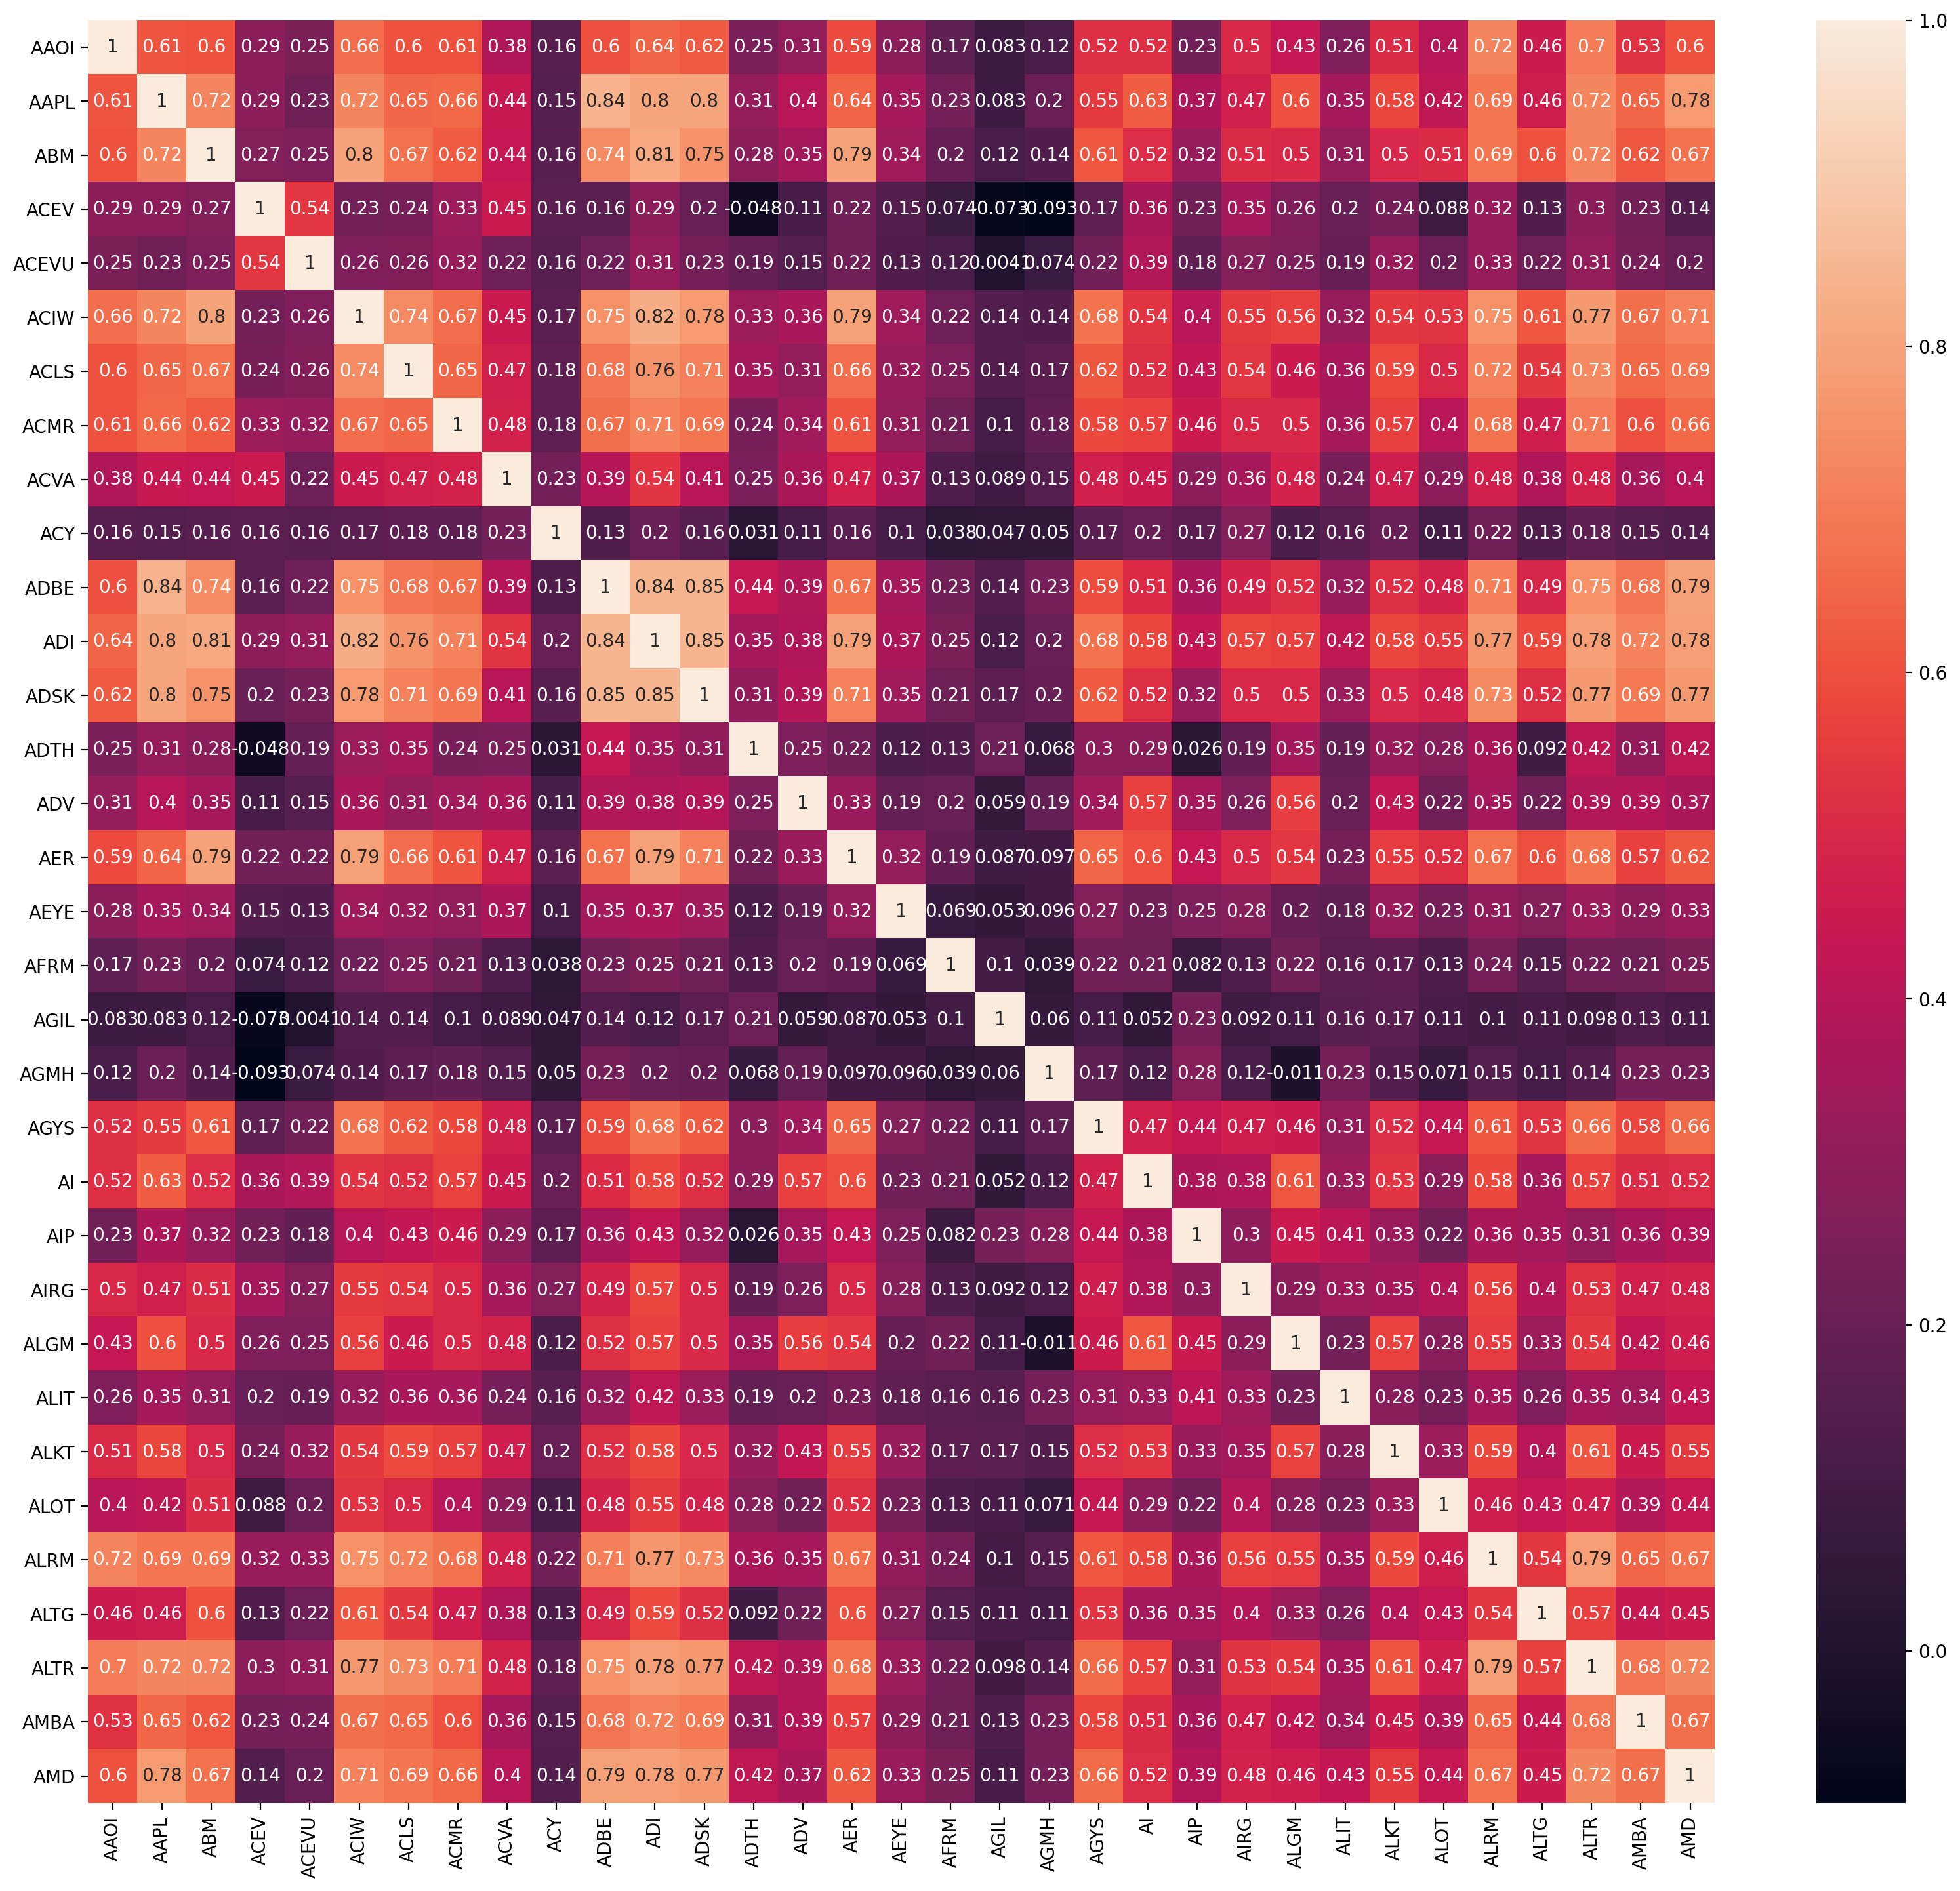

In [209]:

period = 60
volatility = returns.rolling(window=period).std()
figure(figsize=(20, 18), dpi=200)
sn.heatmap(volatility.corr(), annot = True)

<Figure size 4000x3600 with 0 Axes>

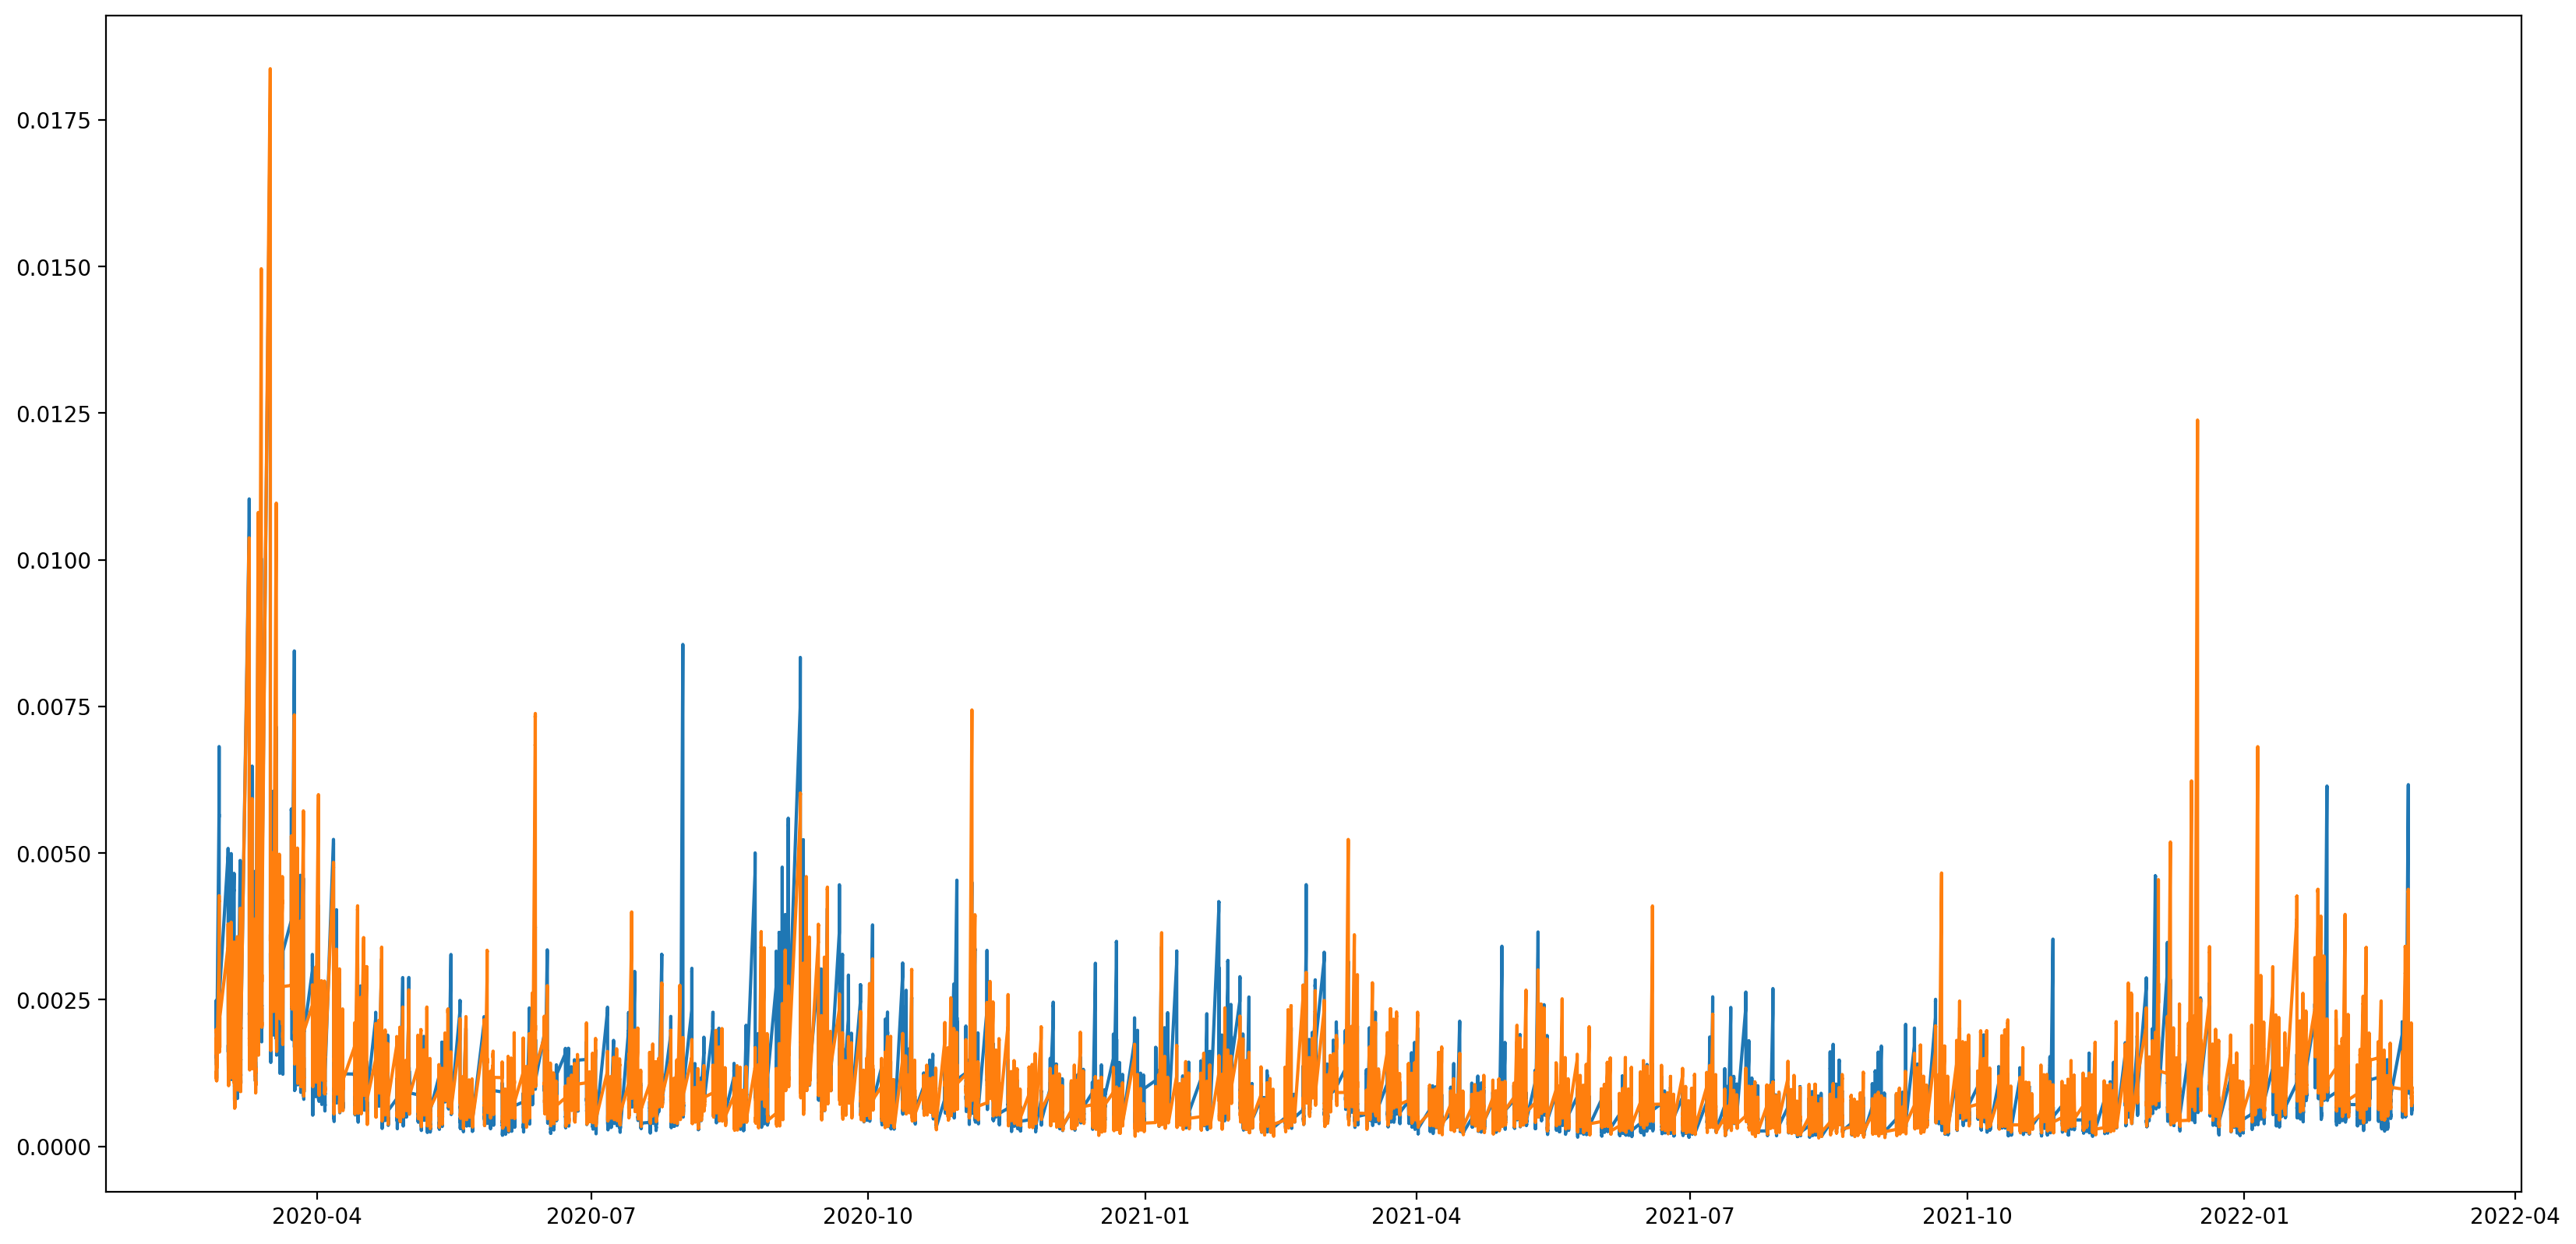

In [232]:
figure(figsize=(20, 18), dpi=200)

AAPL = volatility['AAPL'].dropna() # Apple
ADBE = volatility['ADBE'].dropna() # Adobe
figure(figsize=(20, 10), dpi=200)
plt.plot(AAPL, label = "AAPL")
plt.plot(ADBE, label = "ADBE")



Text(0.5, 1.0, 'Spread between NIKE and AAPL')

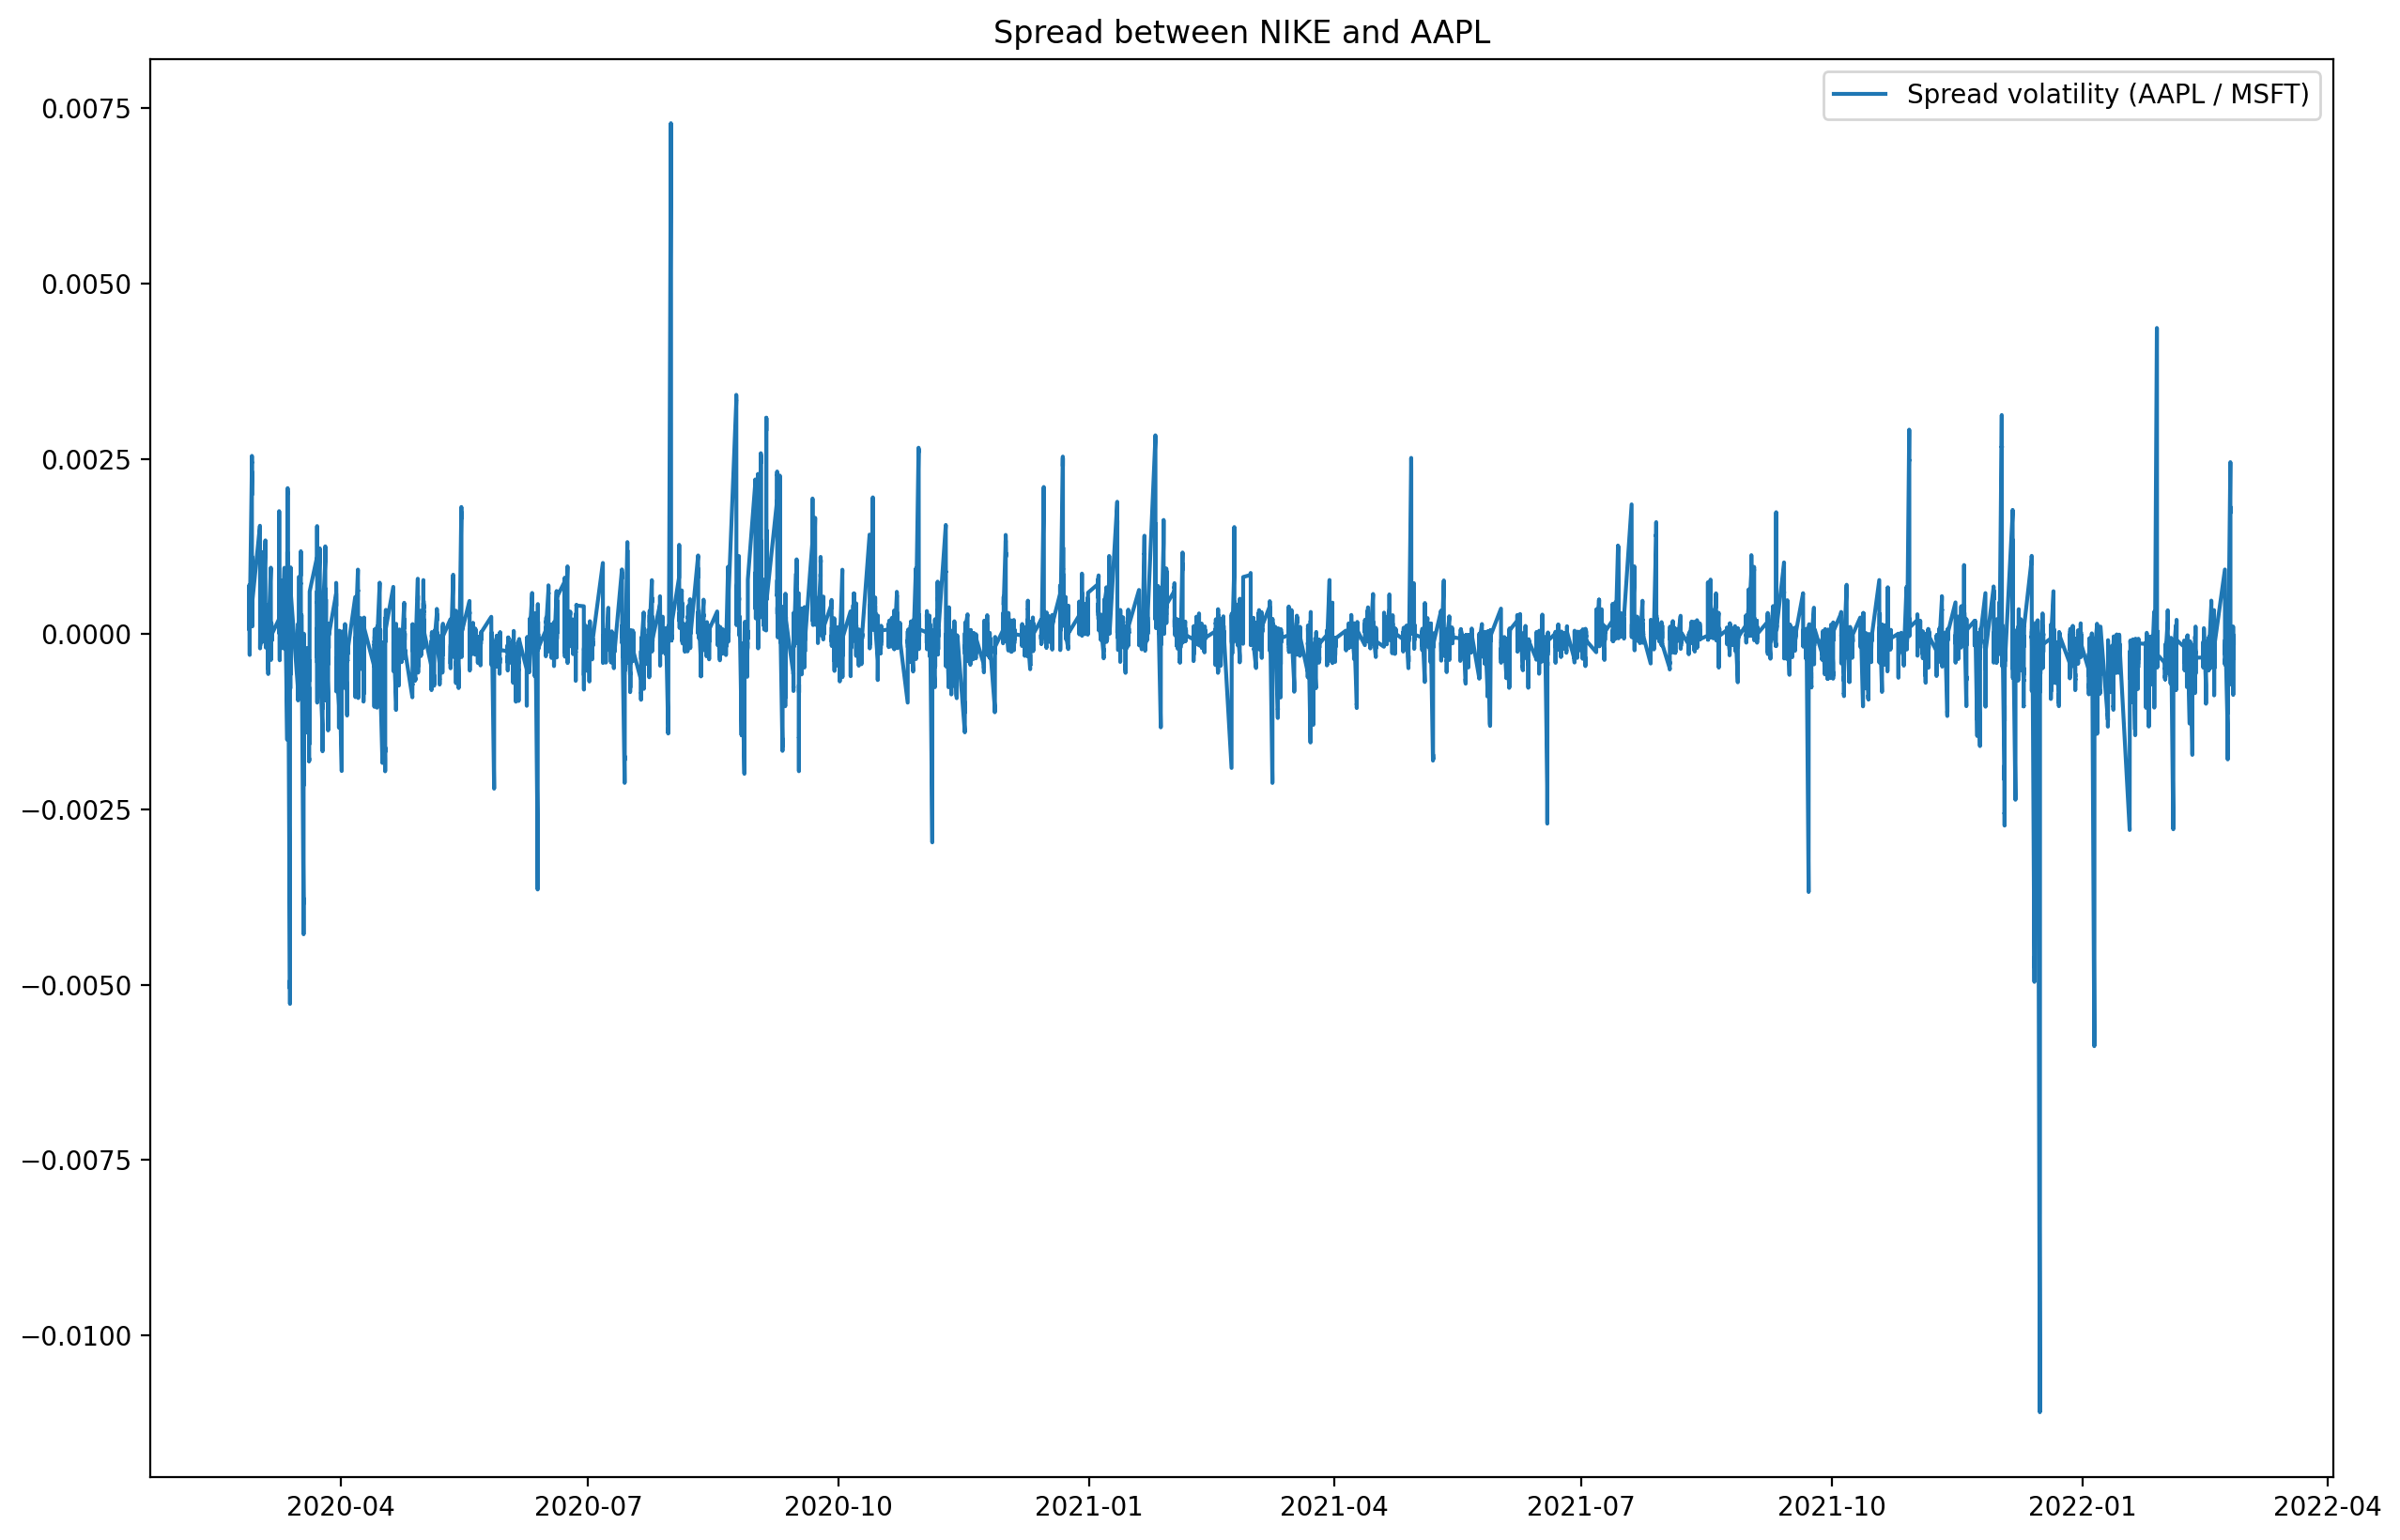

In [233]:
figure(figsize=(15, 10), dpi=200)
plt.plot(AAPL - ADBE, label = 'Spread volatility (AAPL / MSFT)')
plt.legend()
plt.title("Spread between NIKE and AAPL")

In [236]:
result = ts.coint(ALTR, ADI)
result

(-5.594273643242826,
 1.1546556210599054e-05,
 array([-3.89649576, -3.33616111, -3.04447159]))

In [238]:
# Cointegration test: A technique used to find a potential correlation in a time series (long term)
# Determines if the spread between the two assets are constant over time.
# Null Hypothesis: Spread between series are non-stationary.
# Uses the augmented Engle-Granger two-step cointegration test.
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)


We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 1.1546556210599054e-05


In [235]:
# Compute the ADF test for Altair Engineering and Microsoft
# With all time series, you want to have stationary data otherwise our data will be very hard to predict.
# ADF for Berkshire Hathaway Class B
AAPL_ADF = adfuller(AAPL)
print('P value for the Augmented Dickey-Fuller Test is', ALTR_ADF[1])
ADBE_ADF = adfuller(ADBE)
print('P value for the Augmented Dickey-Fuller Test is', ADBE_ADF[1])
Spread_ADF = adfuller(AAPL - ADBE)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])
Ratio_ADF = adfuller(AAPL / ADBE)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])

P value for the Augmented Dickey-Fuller Test is 0.5584070046002765
P value for the Augmented Dickey-Fuller Test is 0.0
P value for the Augmented Dickey-Fuller Test is 0.0
P value for the Augmented Dickey-Fuller Test is 0.0


Text(0.5, 1.0, 'Vol Ratio between BRK and MSFT')

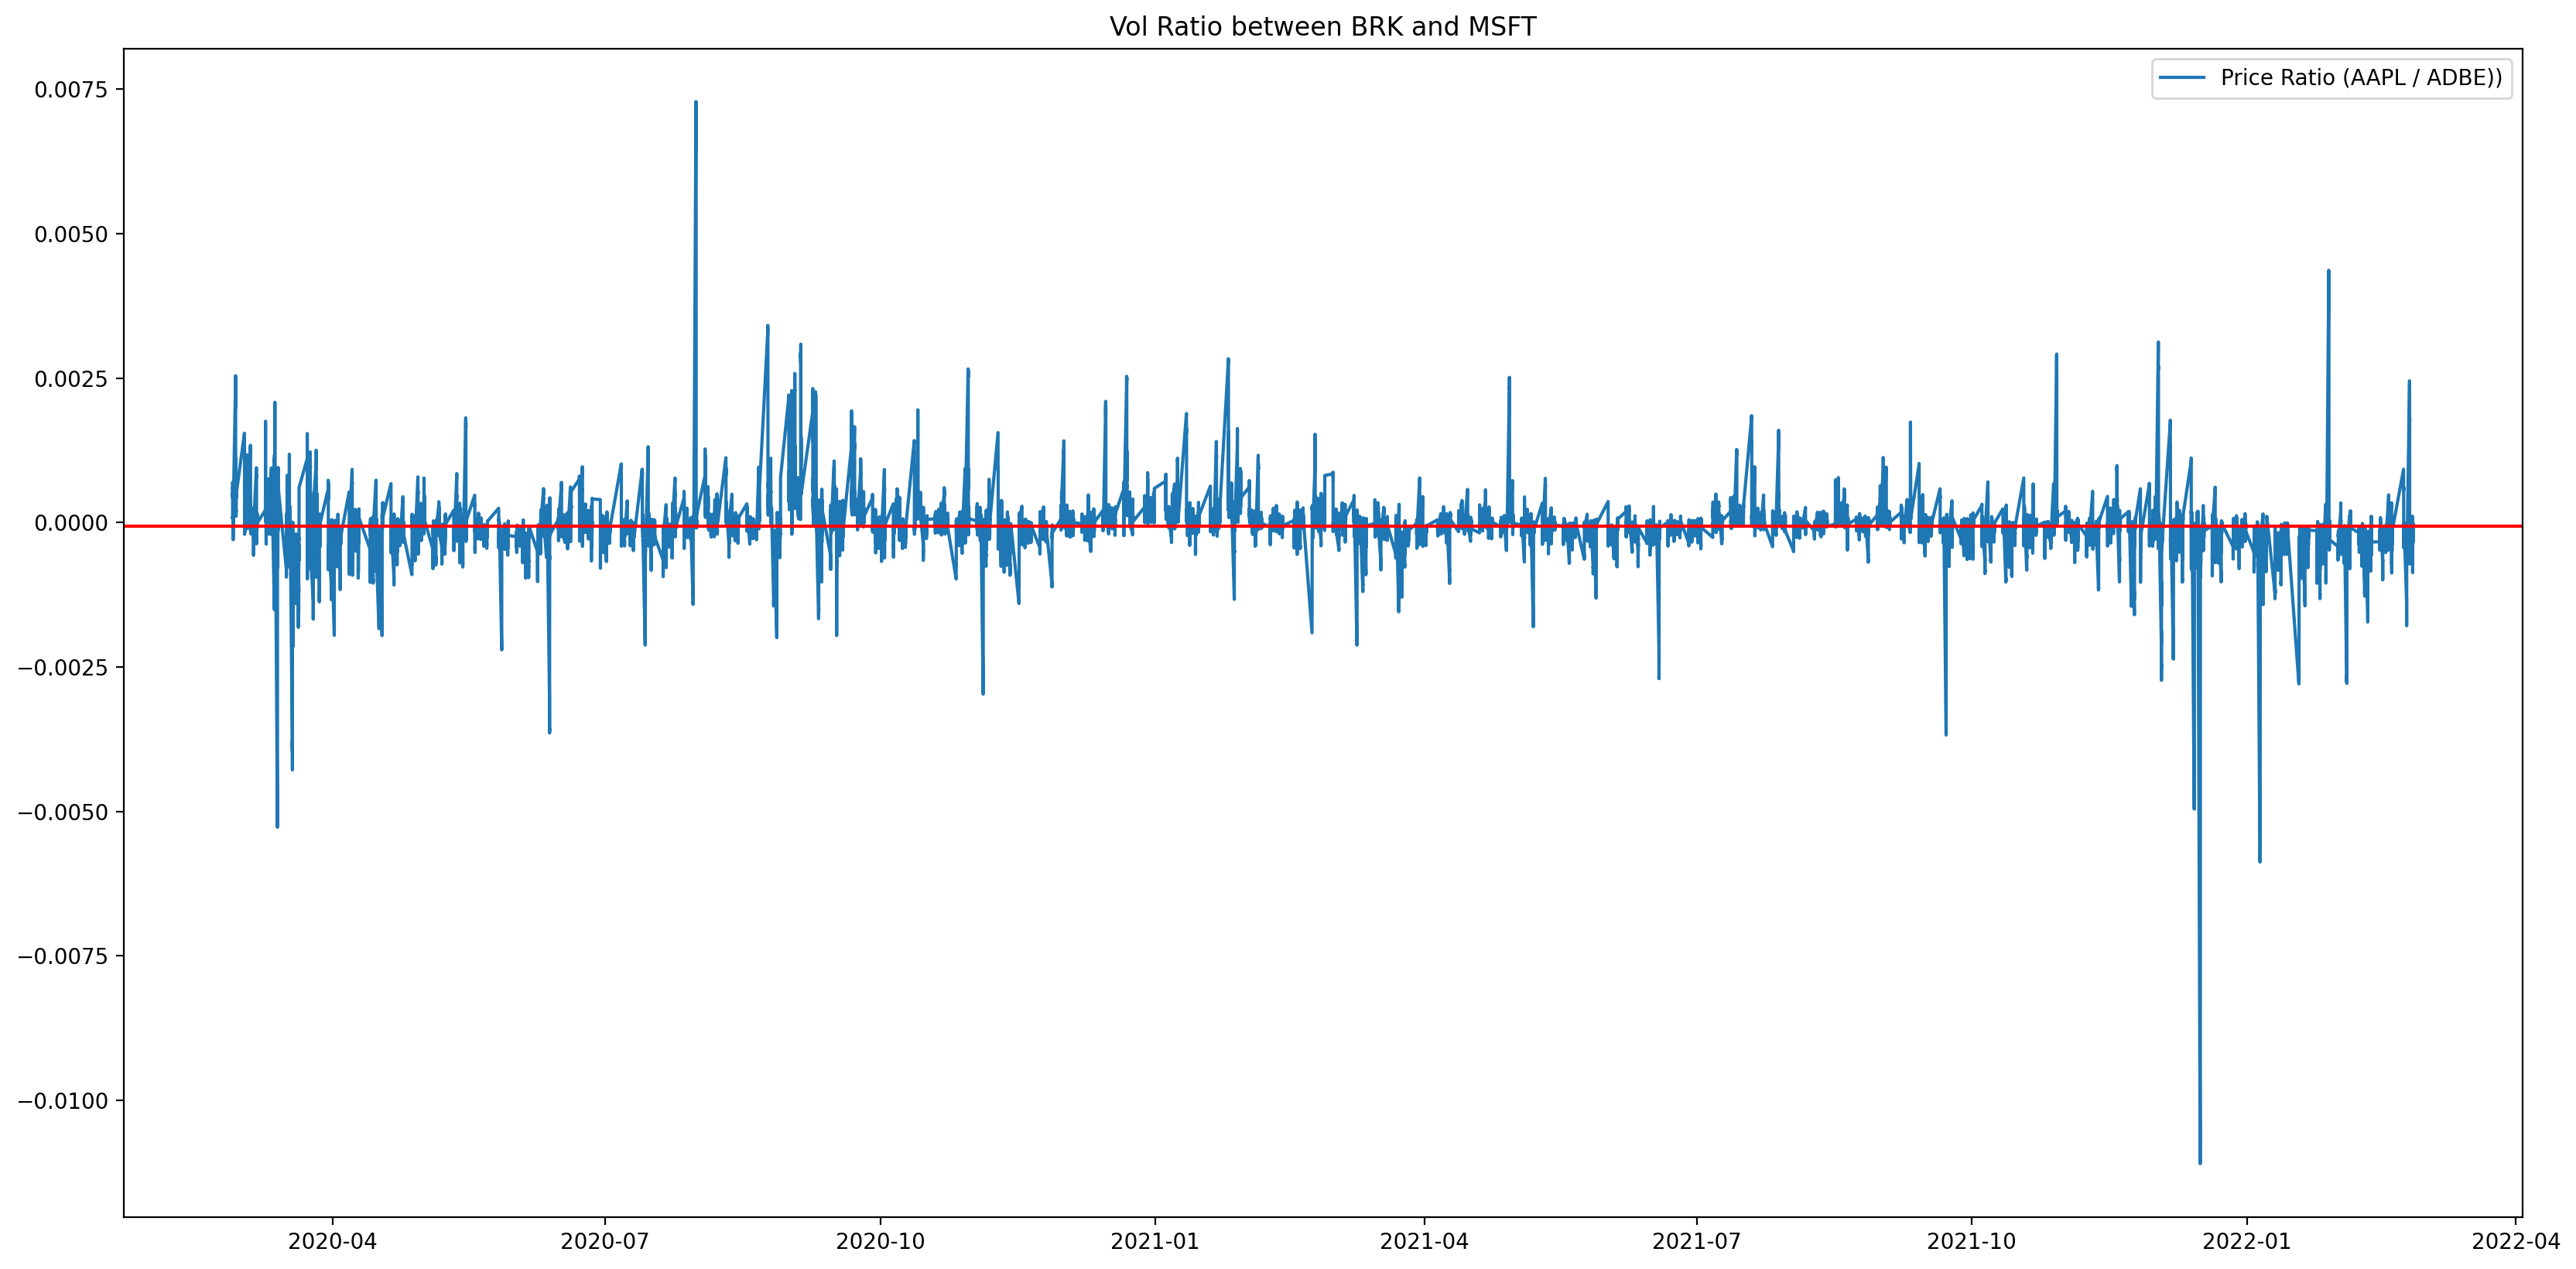

In [244]:
# Also, we can take a look at the price ratios between the two time series.
figure(figsize=(20, 10), dpi=200)
ratio = AAPL - ADBE
plt.plot(ratio, label = 'Price Ratio (AAPL / ADBE))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Vol Ratio between BRK and MSFT")

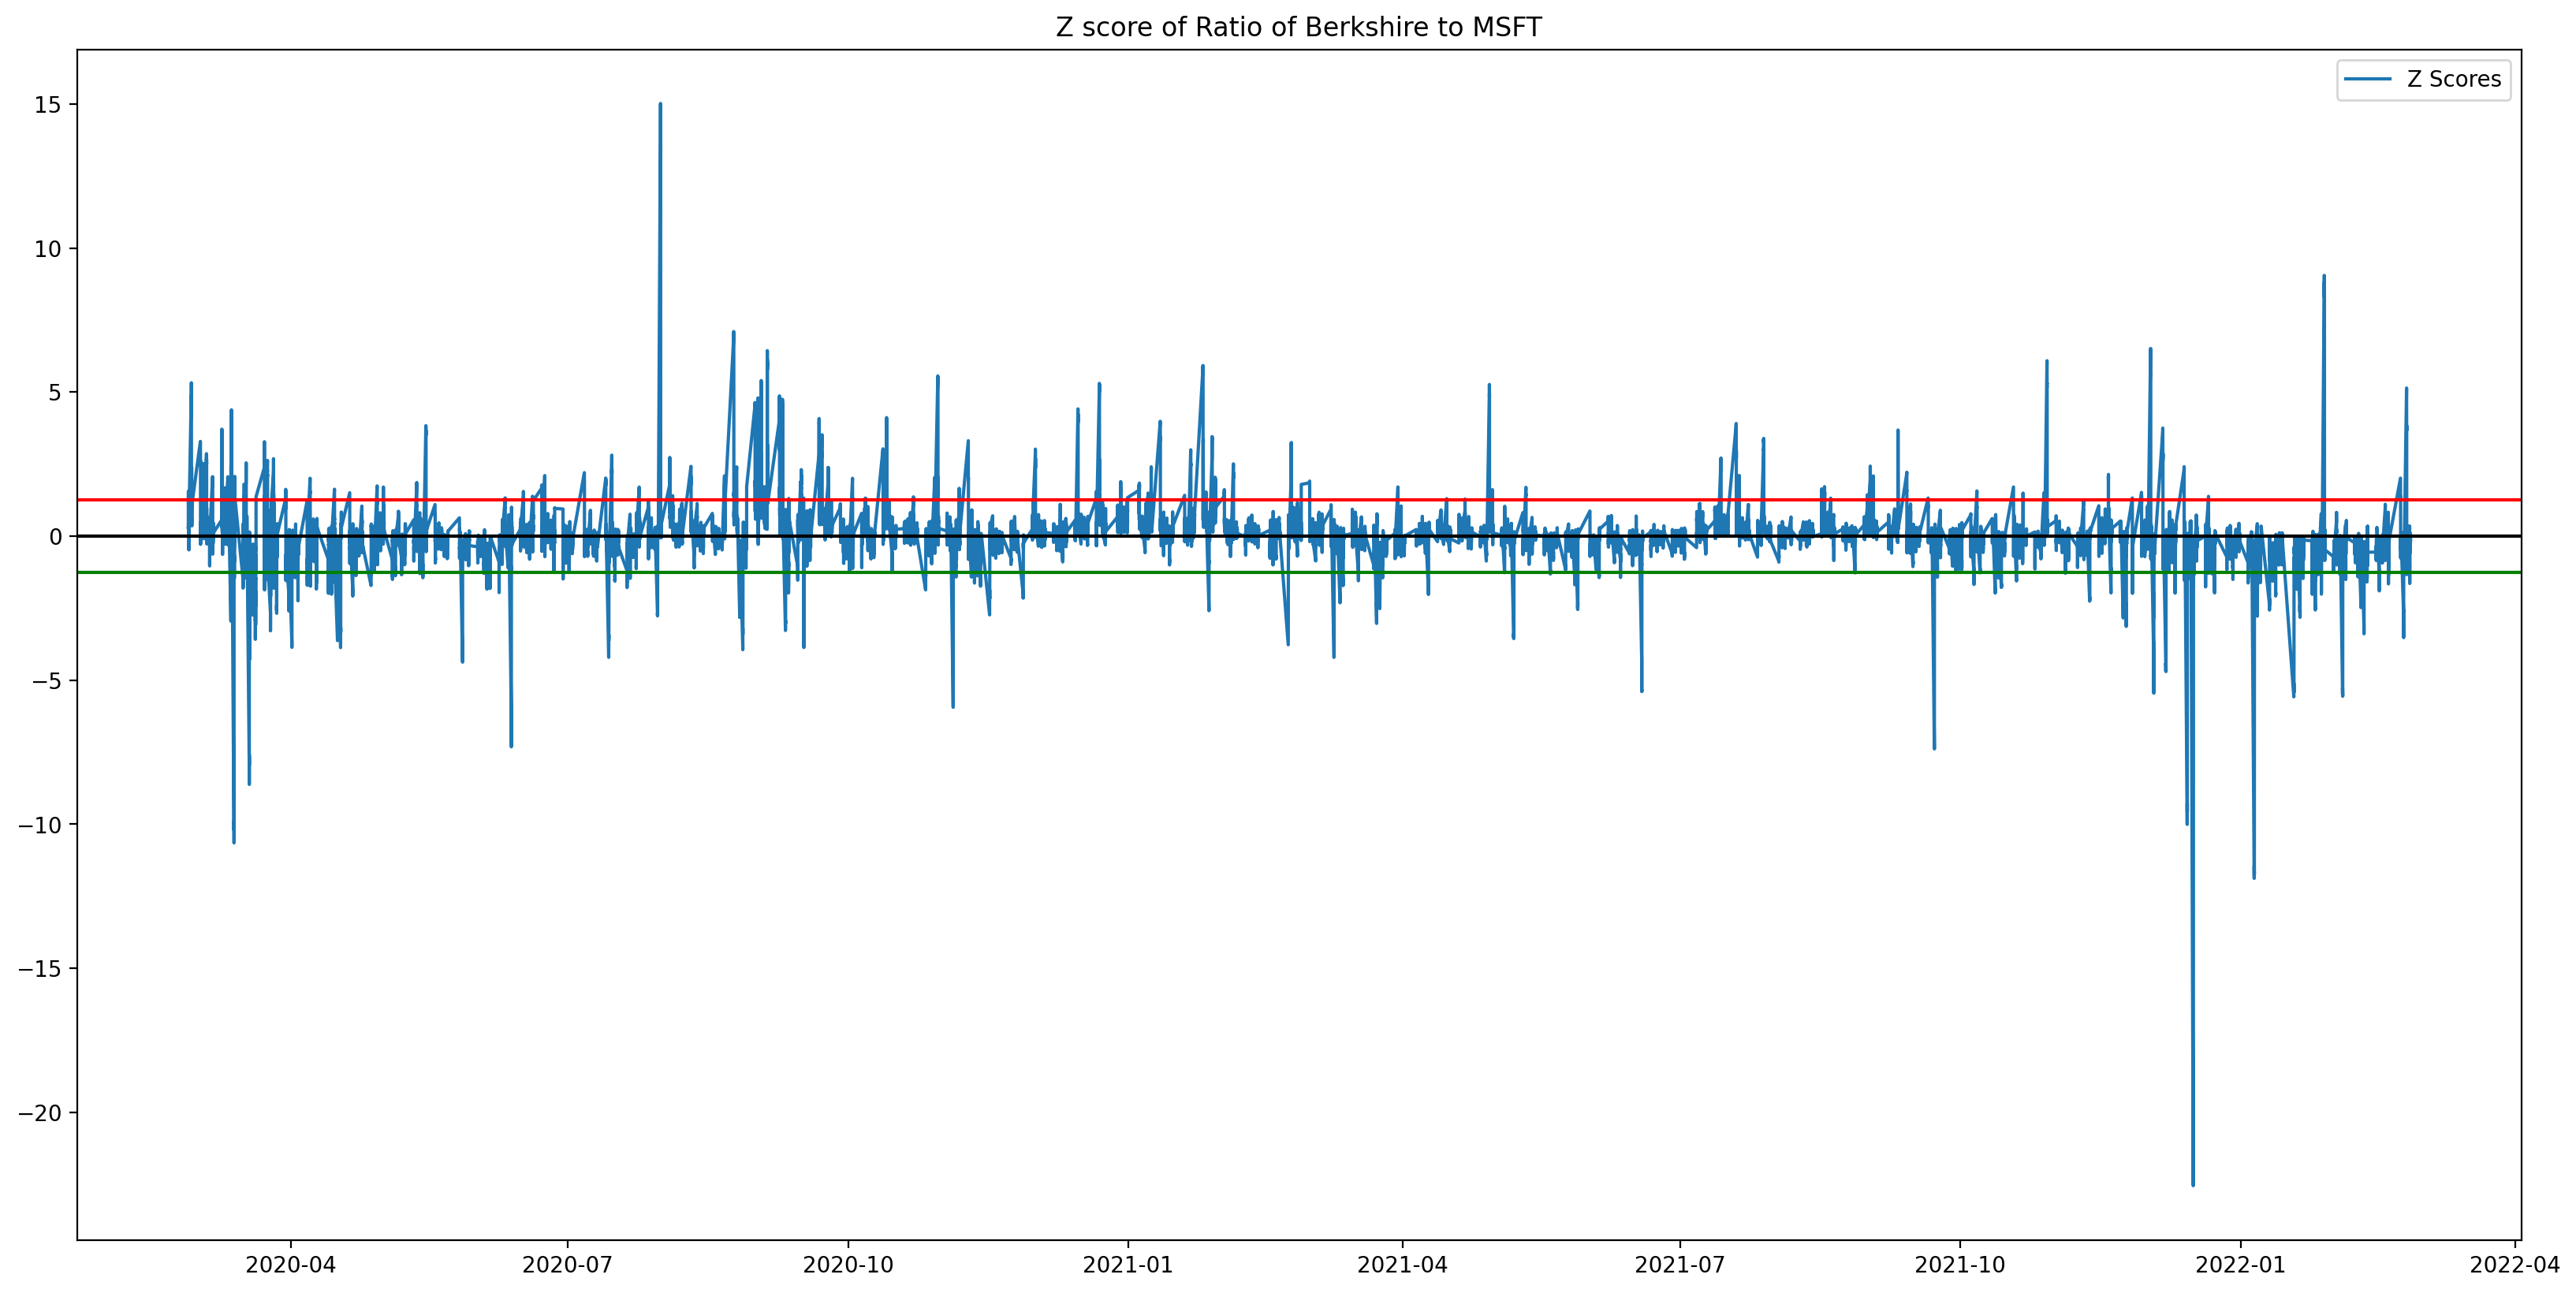

In [246]:
# NOTE, here you can either use the spread OR the Price ratio approach. Anyways, let's standardize the ratio so we can have a 
# upper and lower bound to help evaluate our trends.. Let's stick with the ratio data.
figure(figsize=(20, 10), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
#plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
#plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of Berkshire to MSFT')
plt.show()
# For the most part, the range that exists outside of these 'bands' must come converge back to the mean. Thus, you can 
# determine when you can go long or short the pair (BRK_B to MSFT).

In [95]:
returns = minTick_data.pct_change()
corr_matrix = minTick_data.corr()
corr_matrix

AAOI      AAPL       ABM      ACEV     ACEVU      ACIW      ACLS  \
AAOI   1.000000 -0.495337 -0.306763  0.454515  0.235053 -0.130550 -0.664679   
AAPL  -0.495337  1.000000  0.696058 -0.127413 -0.114413  0.555180  0.860718   
ABM   -0.306763  0.696058  1.000000 -0.080688  0.195879  0.724610  0.614240   
ACEV   0.454515 -0.127413 -0.080688  1.000000  0.927569  0.546935 -0.085472   
ACEVU  0.235053 -0.114413  0.195879  0.927569  1.000000  0.700814 -0.016049   
ACIW  -0.130550  0.555180  0.724610  0.546935  0.700814  1.000000  0.401875   
ACLS  -0.664679  0.860718  0.614240 -0.085472 -0.016049  0.401875  1.000000   
ACMR   0.117478  0.662127  0.612659  0.513469  0.404748  0.545798  0.462506   
ACVA   0.720554 -0.763873  0.833959  0.036262  0.665406  0.703090 -0.647442   
ACY   -0.618402  0.740193  0.447491 -0.171269 -0.161158  0.144185  0.854722   
ADBE  -0.329339  0.830746  0.702207 -0.315988 -0.241401  0.369781  0.662479   
ADI   -0.504110  0.893453  0.827868  0.041349  0.211313  0.662596  0.846256   
ADSK  -0.112197  0.732912  0.784971  0.237485  0.362171  0.707159  0.502113   
ADTH   0.780599 -0.589763  0.571083 -0.322549  0.347006  0.025036 -0.593309   
ADV    0.522949 -0.499600 -0.000385  0.168244  0.319730  0.222906 -0.590547   
AER   -0.637633  0.797675  0.817795 -0.078479  0.123032  0.629807  0.876440   
AEYE   0.424588  0.108431  0.399533  0.637658  0.703965  0.699459 -0.151012   
AFRM   0.173238  0.142263 -0.225378  0.183968  0.110989 -0.364166  0.214282   
AGIL   0.479130 -0.343492  0.044965  0.102502  0.167152 -0.002431 -0.487504   
AGMH   0.685540 -0.807849 -0.460525  0.319535  0.315926 -0.310649 -0.795406   
AGYS  -0.375769  0.712153  0.861404  0.241021  0.426929  0.775865  0.602928   
AI     0.852714 -0.621817 -0.342654  0.725538  0.752509  0.662348 -0.705729   
AIP    0.685743 -0.156072  0.578792 -0.565444  0.730111 -0.319517  0.000437   
AIRG   0.273240  0.269632  0.591908  0.561528  0.728643  0.814705  0.031855   
ALGM  -0.182303  0.663163 -0.050387  0.137382  0.046267 -0.278764  0.660111   
ALIT   0.100195  0.064272 -0.040596  0.288495  0.246321  0.010967  0.111311   
ALKT   0.842268 -0.787581  0.755029 -0.134077  0.588169  0.538352 -0.750895   
ALOT  -0.598129  0.750973  0.831618 -0.209888  0.053268  0.572978  0.765761   
ALRM  -0.137299  0.703466  0.758222  0.601470  0.694114  0.849577  0.535335   
ALTG  -0.545828  0.859523  0.864292 -0.178976  0.047720  0.614096  0.851722   
ALTR  -0.468828  0.881093  0.849381 -0.009073  0.189782  0.664034  0.798103   
AMBA  -0.611461  0.824332  0.589271  0.033077  0.111576  0.422557  0.917618   
AMD   -0.516257  0.918711  0.551836 -0.146694 -0.177976  0.361602  0.865257   

           ACMR      ACVA       ACY  ...      AIRG      ALGM      ALIT  \
AAOI   0.117478  0.720554 -0.618402  ...  0.273240 -0.182303  0.100195   
AAPL   0.662127 -0.763873  0.740193  ...  0.269632  0.663163  0.064272   
ABM    0.612659  0.833959  0.447491  ...  0.591908 -0.050387 -0.040596   
ACEV   0.513469  0.036262 -0.171269  ...  0.561528  0.137382  0.288495   
ACEVU  0.404748  0.665406 -0.161158  ...  0.728643  0.046267  0.246321   
ACIW   0.545798  0.703090  0.144185  ...  0.814705 -0.278764  0.010967   
ACLS   0.462506 -0.647442  0.854722  ...  0.031855  0.660111  0.111311   
ACMR   1.000000 -0.199350  0.425340  ...  0.545126  0.451879  0.415162   
ACVA  -0.199350  1.000000 -0.645637  ...  0.846765 -0.506439 -0.194537   
ACY    0.425340 -0.645637  1.000000  ... -0.158978  0.743830  0.277097   
ADBE   0.690094 -0.243510  0.683030  ...  0.234206  0.563049  0.182322   
ADI    0.691358 -0.389450  0.738217  ...  0.395887  0.774023  0.190791   
ADSK   0.787389  0.341276  0.449986  ...  0.614653  0.302227  0.281150   
ADTH   0.302893  0.574423 -0.250005  ...  0.448340  0.007714  0.282940   
ADV   -0.166040  0.887638 -0.676163  ...  0.435133 -0.474617 -0.014799   
AER    0.491518 -0.330374  0.739453  ...  0.284359  0.451035  0.054930   
AEYE   0.493746  0.914404 -0.305477  ...  0.890453 -0.372213  0.05

In [96]:
# Let's heatmap this matrix so that we can have a better sense of what is going on
import seaborn as sn
from matplotlib.pyplot import figure

<AxesSubplot:>

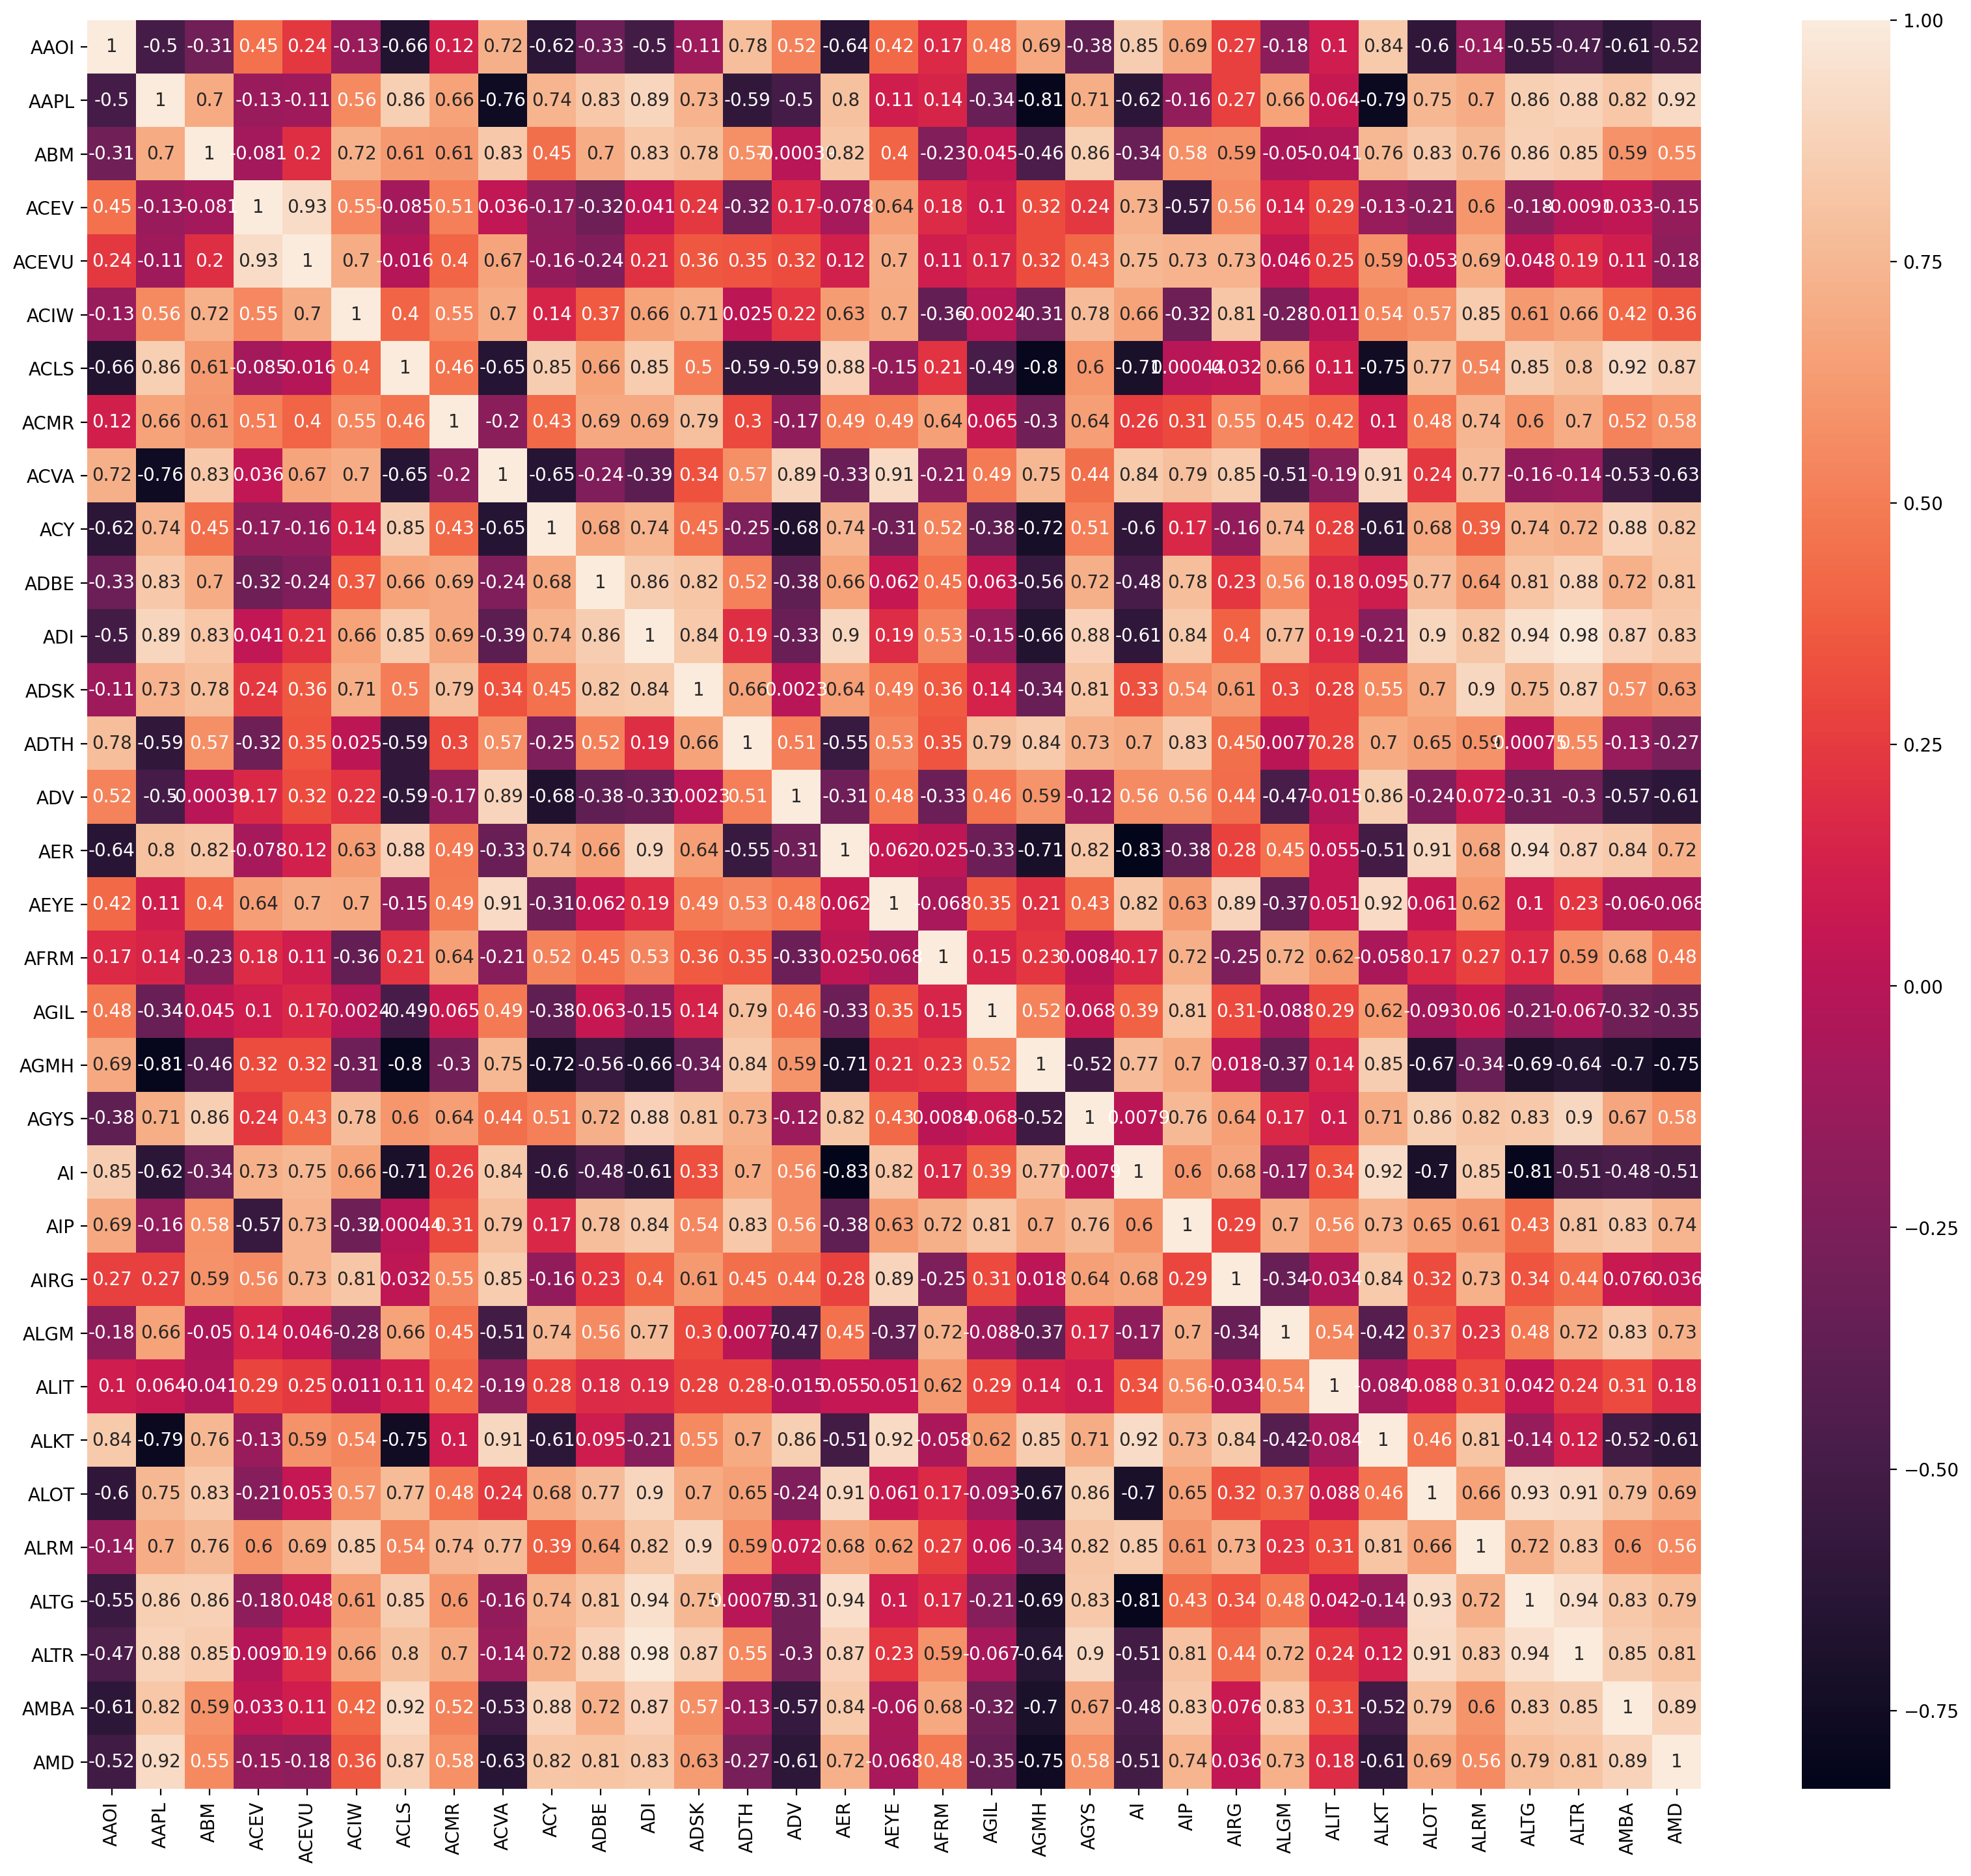

In [97]:
figure(figsize=(20, 18), dpi=200)
sn.heatmap(corr_matrix, annot = True)

In [108]:

ALTR = minTick_data['ALTR'] # S&P 500
ADI = minTick_data['ADI'] # Berkshire Class A share


In [77]:
fee = 0.001
window = 252
threshod = 1
for t in range(window, len(data)):
    returns.iloc[t-252:t].std()
    


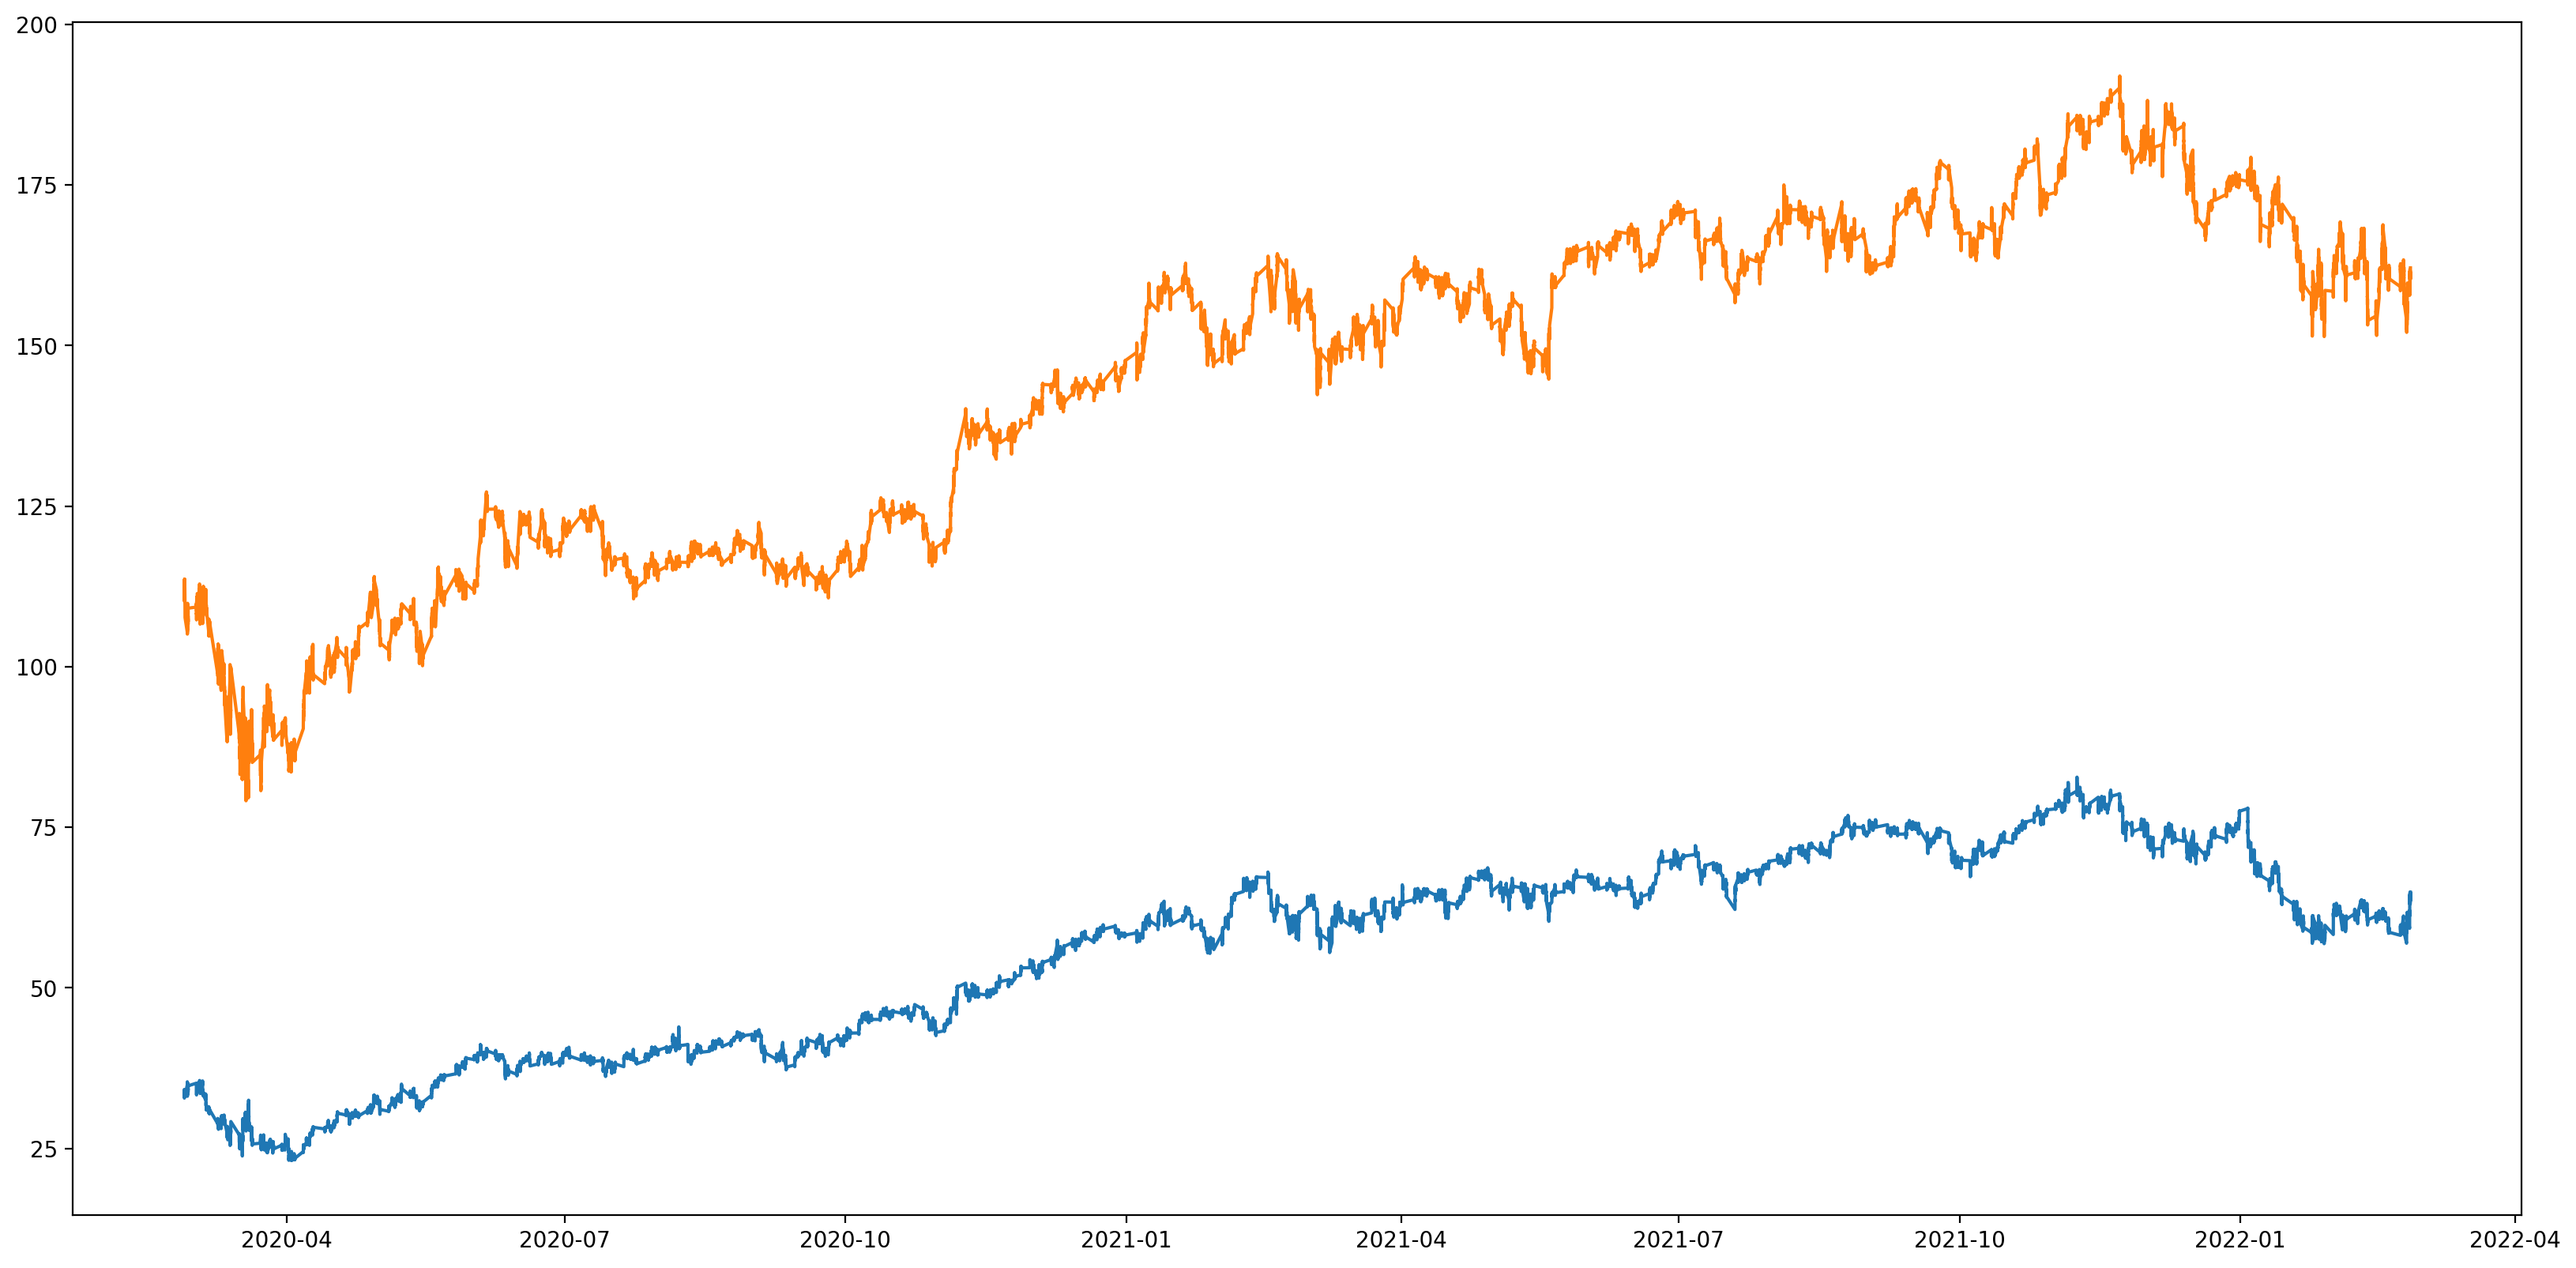

In [173]:
figure(figsize=(20, 10), dpi=200)
plt.plot(ALTR, label = "ALTR")
plt.plot(ADI, label = "ADI")



Text(0.5, 1.0, 'Spread between NIKE and AAPL')

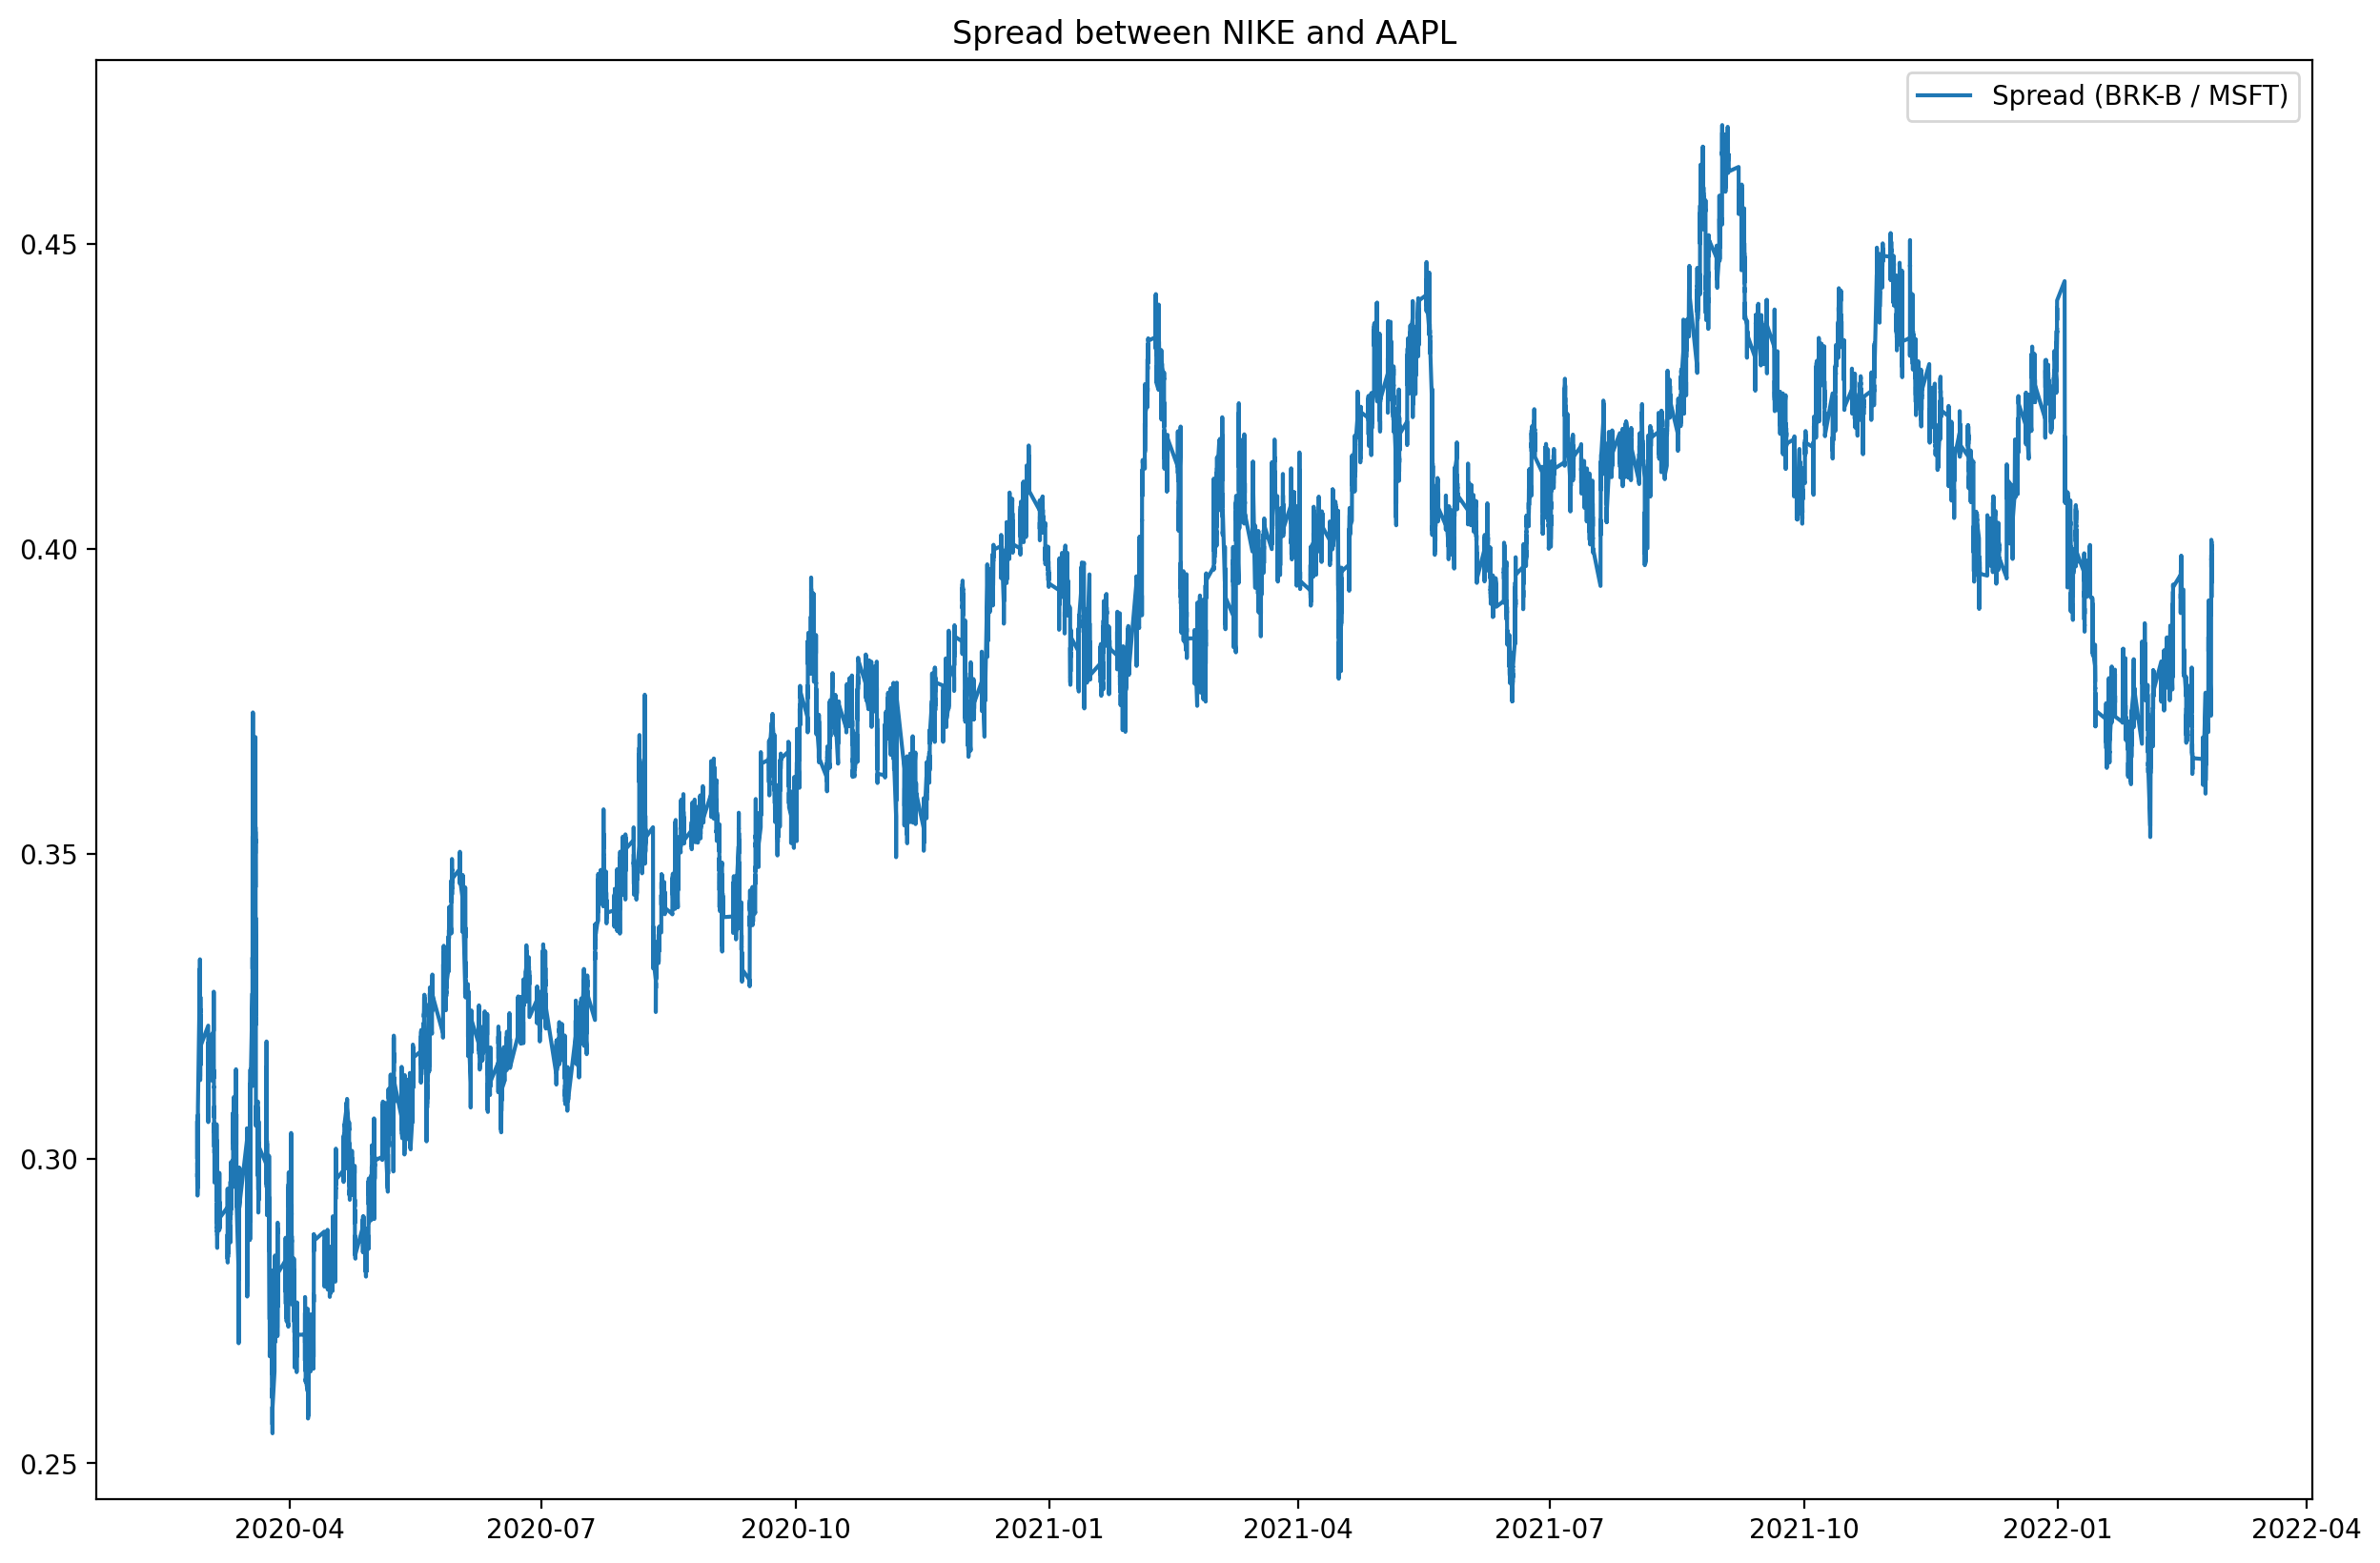

In [176]:
# plot the spread
figure(figsize=(15, 10), dpi=200)
plt.plot(ALTR / ADI, label = 'Spread (BRK-B / MSFT)')
plt.legend()
plt.title("Spread between NIKE and AAPL")

In [127]:
# Check out the cointegration value: Null hyp. = no cointegration
import statsmodels.tsa.stattools as ts 
result = ts.coint(ALTR, ADI)
result

(-5.594273643242826,
 1.1546556210599054e-05,
 array([-3.89649576, -3.33616111, -3.04447159]))

In [128]:
# Cointegration test: A technique used to find a potential correlation in a time series (long term)
# Determines if the spread between the two assets are constant over time.
# Null Hypothesis: Spread between series are non-stationary.
# Uses the augmented Engle-Granger two-step cointegration test.
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)


We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 1.1546556210599054e-05


In [130]:
from statsmodels.tsa.stattools import adfuller
# Compute the ADF test for Altair Engineering and Microsoft
# With all time series, you want to have stationary data otherwise our data will be very hard to predict.
# ADF for Berkshire Hathaway Class B
ALTR_ADF = adfuller(ALTR)
print('P value for the Augmented Dickey-Fuller Test is', ALTR_ADF[1])
ADI_ADF = adfuller(ADI)
print('P value for the Augmented Dickey-Fuller Test is', ADI_ADF[1])
Spread_ADF = adfuller(ALTR - ADI)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])
Ratio_ADF = adfuller(ALTR / ADI)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])
# Spread looks fine. If you'd want even better results, consider taking the difference (order 1) of Berkshire and MSFT

# Results: can only claim stationary for the spread (since P value < 0.05). This suggests a constant mean over time.
# Therefore, the two series are cointegrated.

P value for the Augmented Dickey-Fuller Test is 0.5584070046002765
P value for the Augmented Dickey-Fuller Test is 0.5612794975238714
P value for the Augmented Dickey-Fuller Test is 0.15241834814995503
P value for the Augmented Dickey-Fuller Test is 0.12164083451974023


Text(0.5, 1.0, 'Price Ratio between BRK and MSFT')

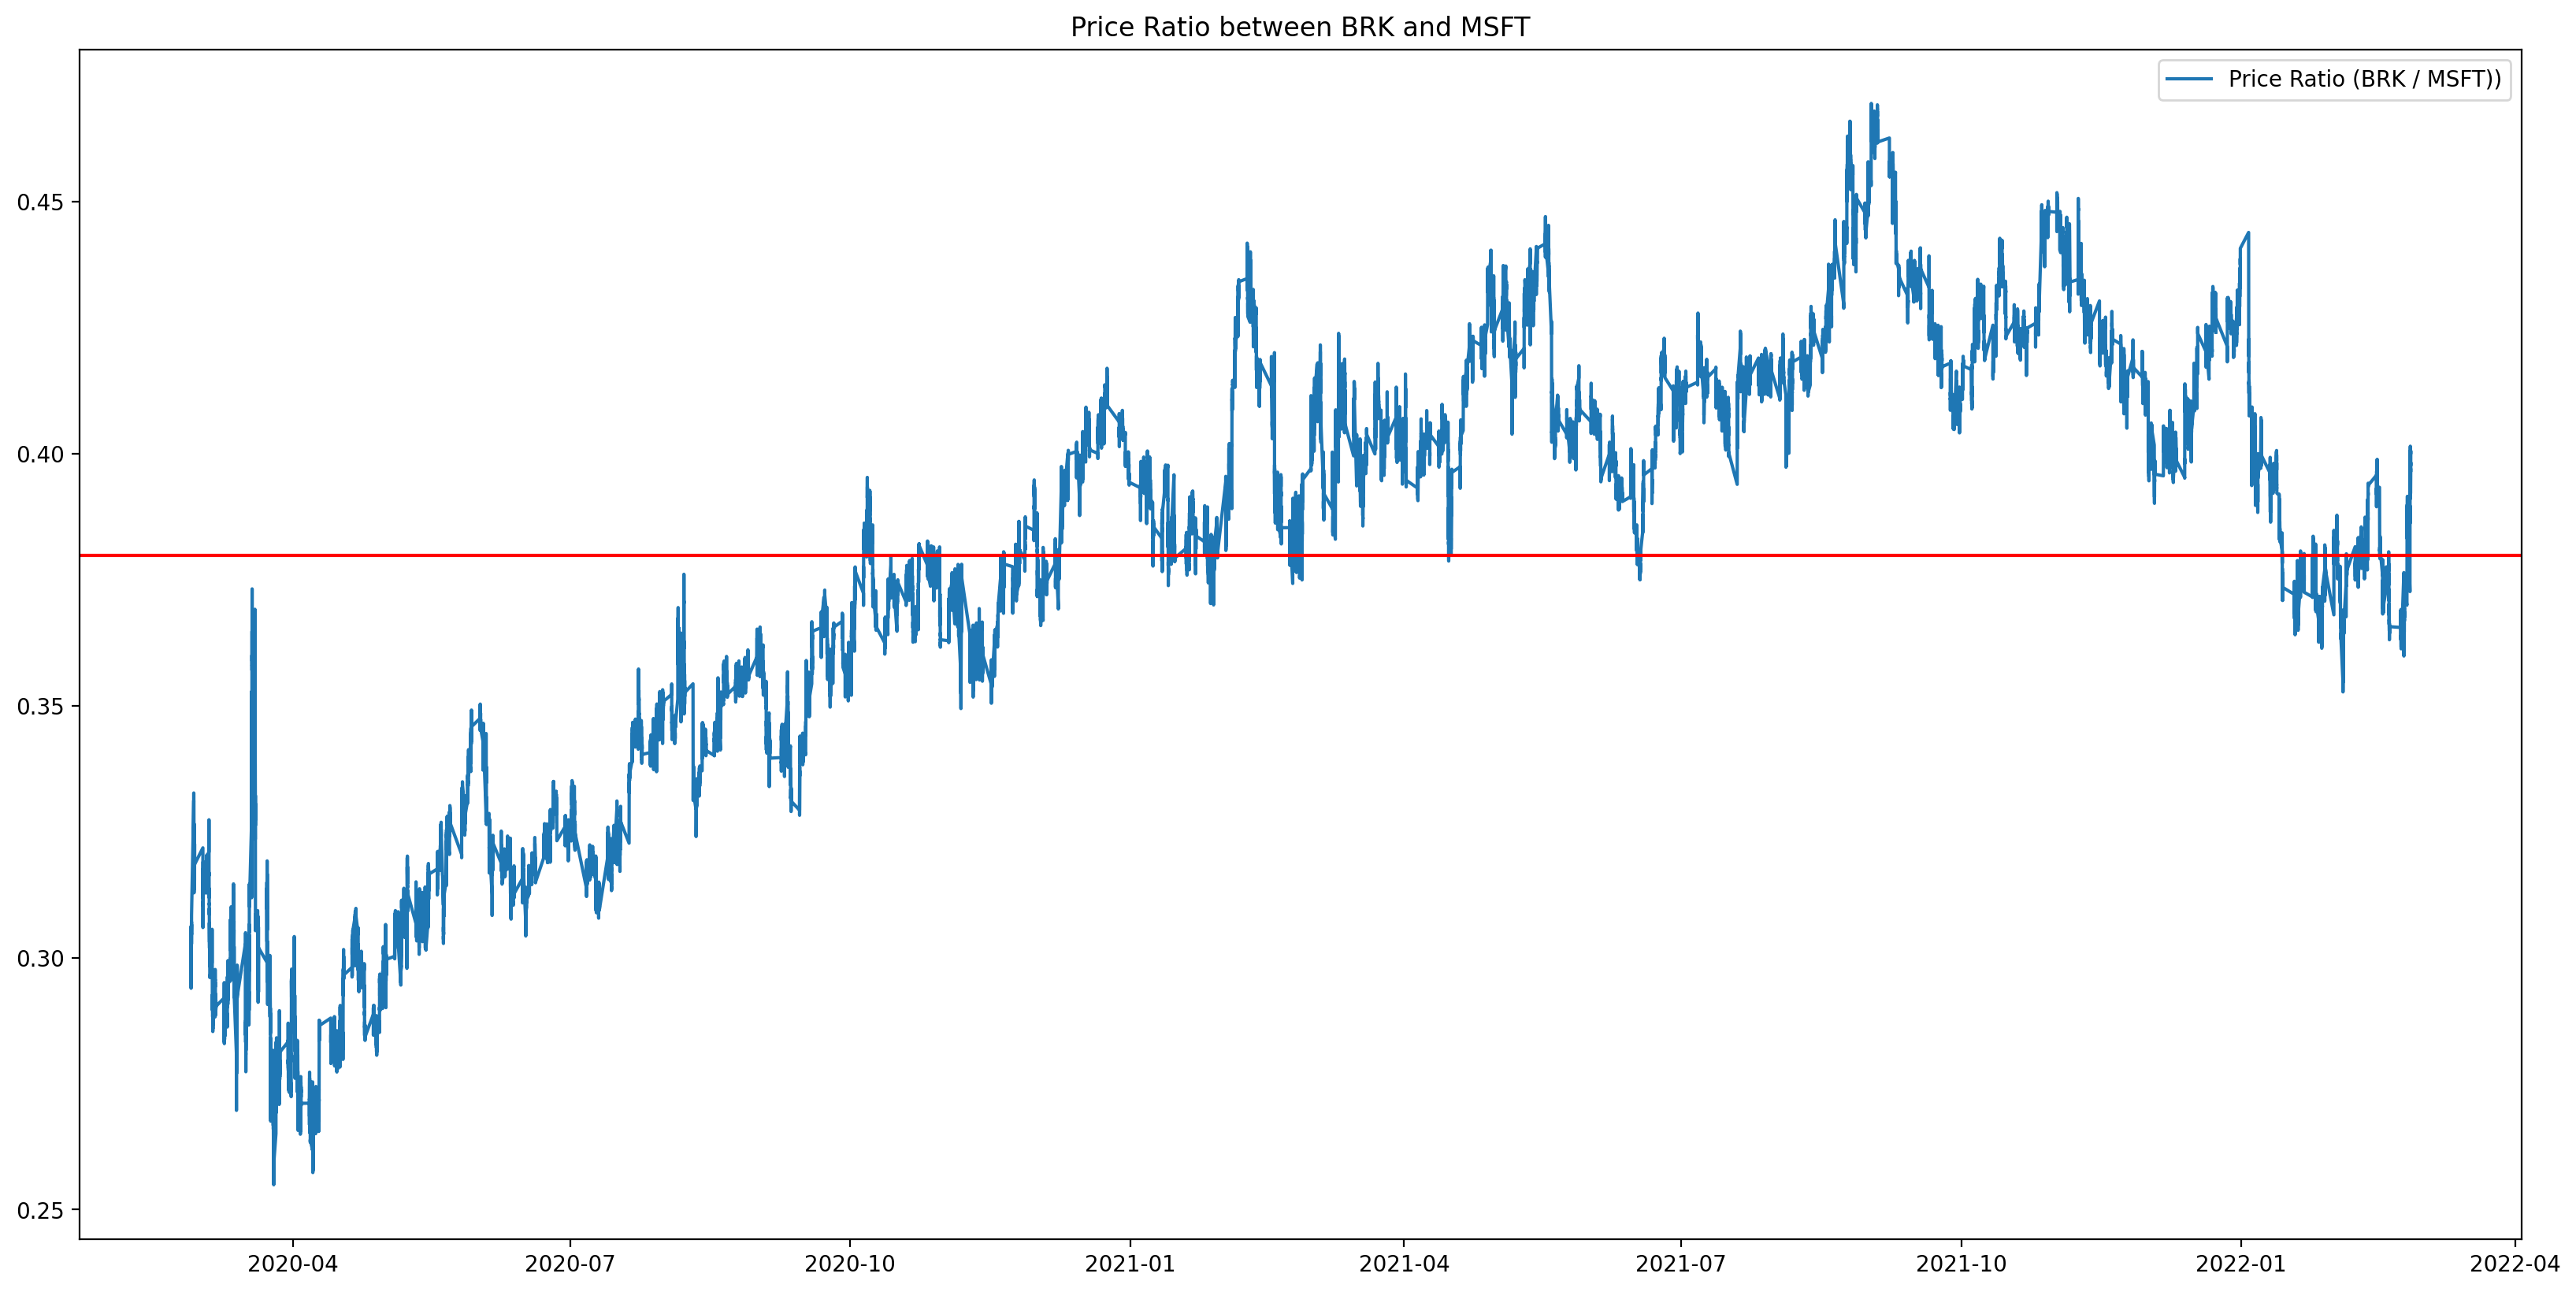

In [141]:
# Also, we can take a look at the price ratios between the two time series.
figure(figsize=(20, 10), dpi=200)
ratio = ALTR / ADI
plt.plot(ratio, label = 'Price Ratio (BRK / MSFT))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between BRK and MSFT")

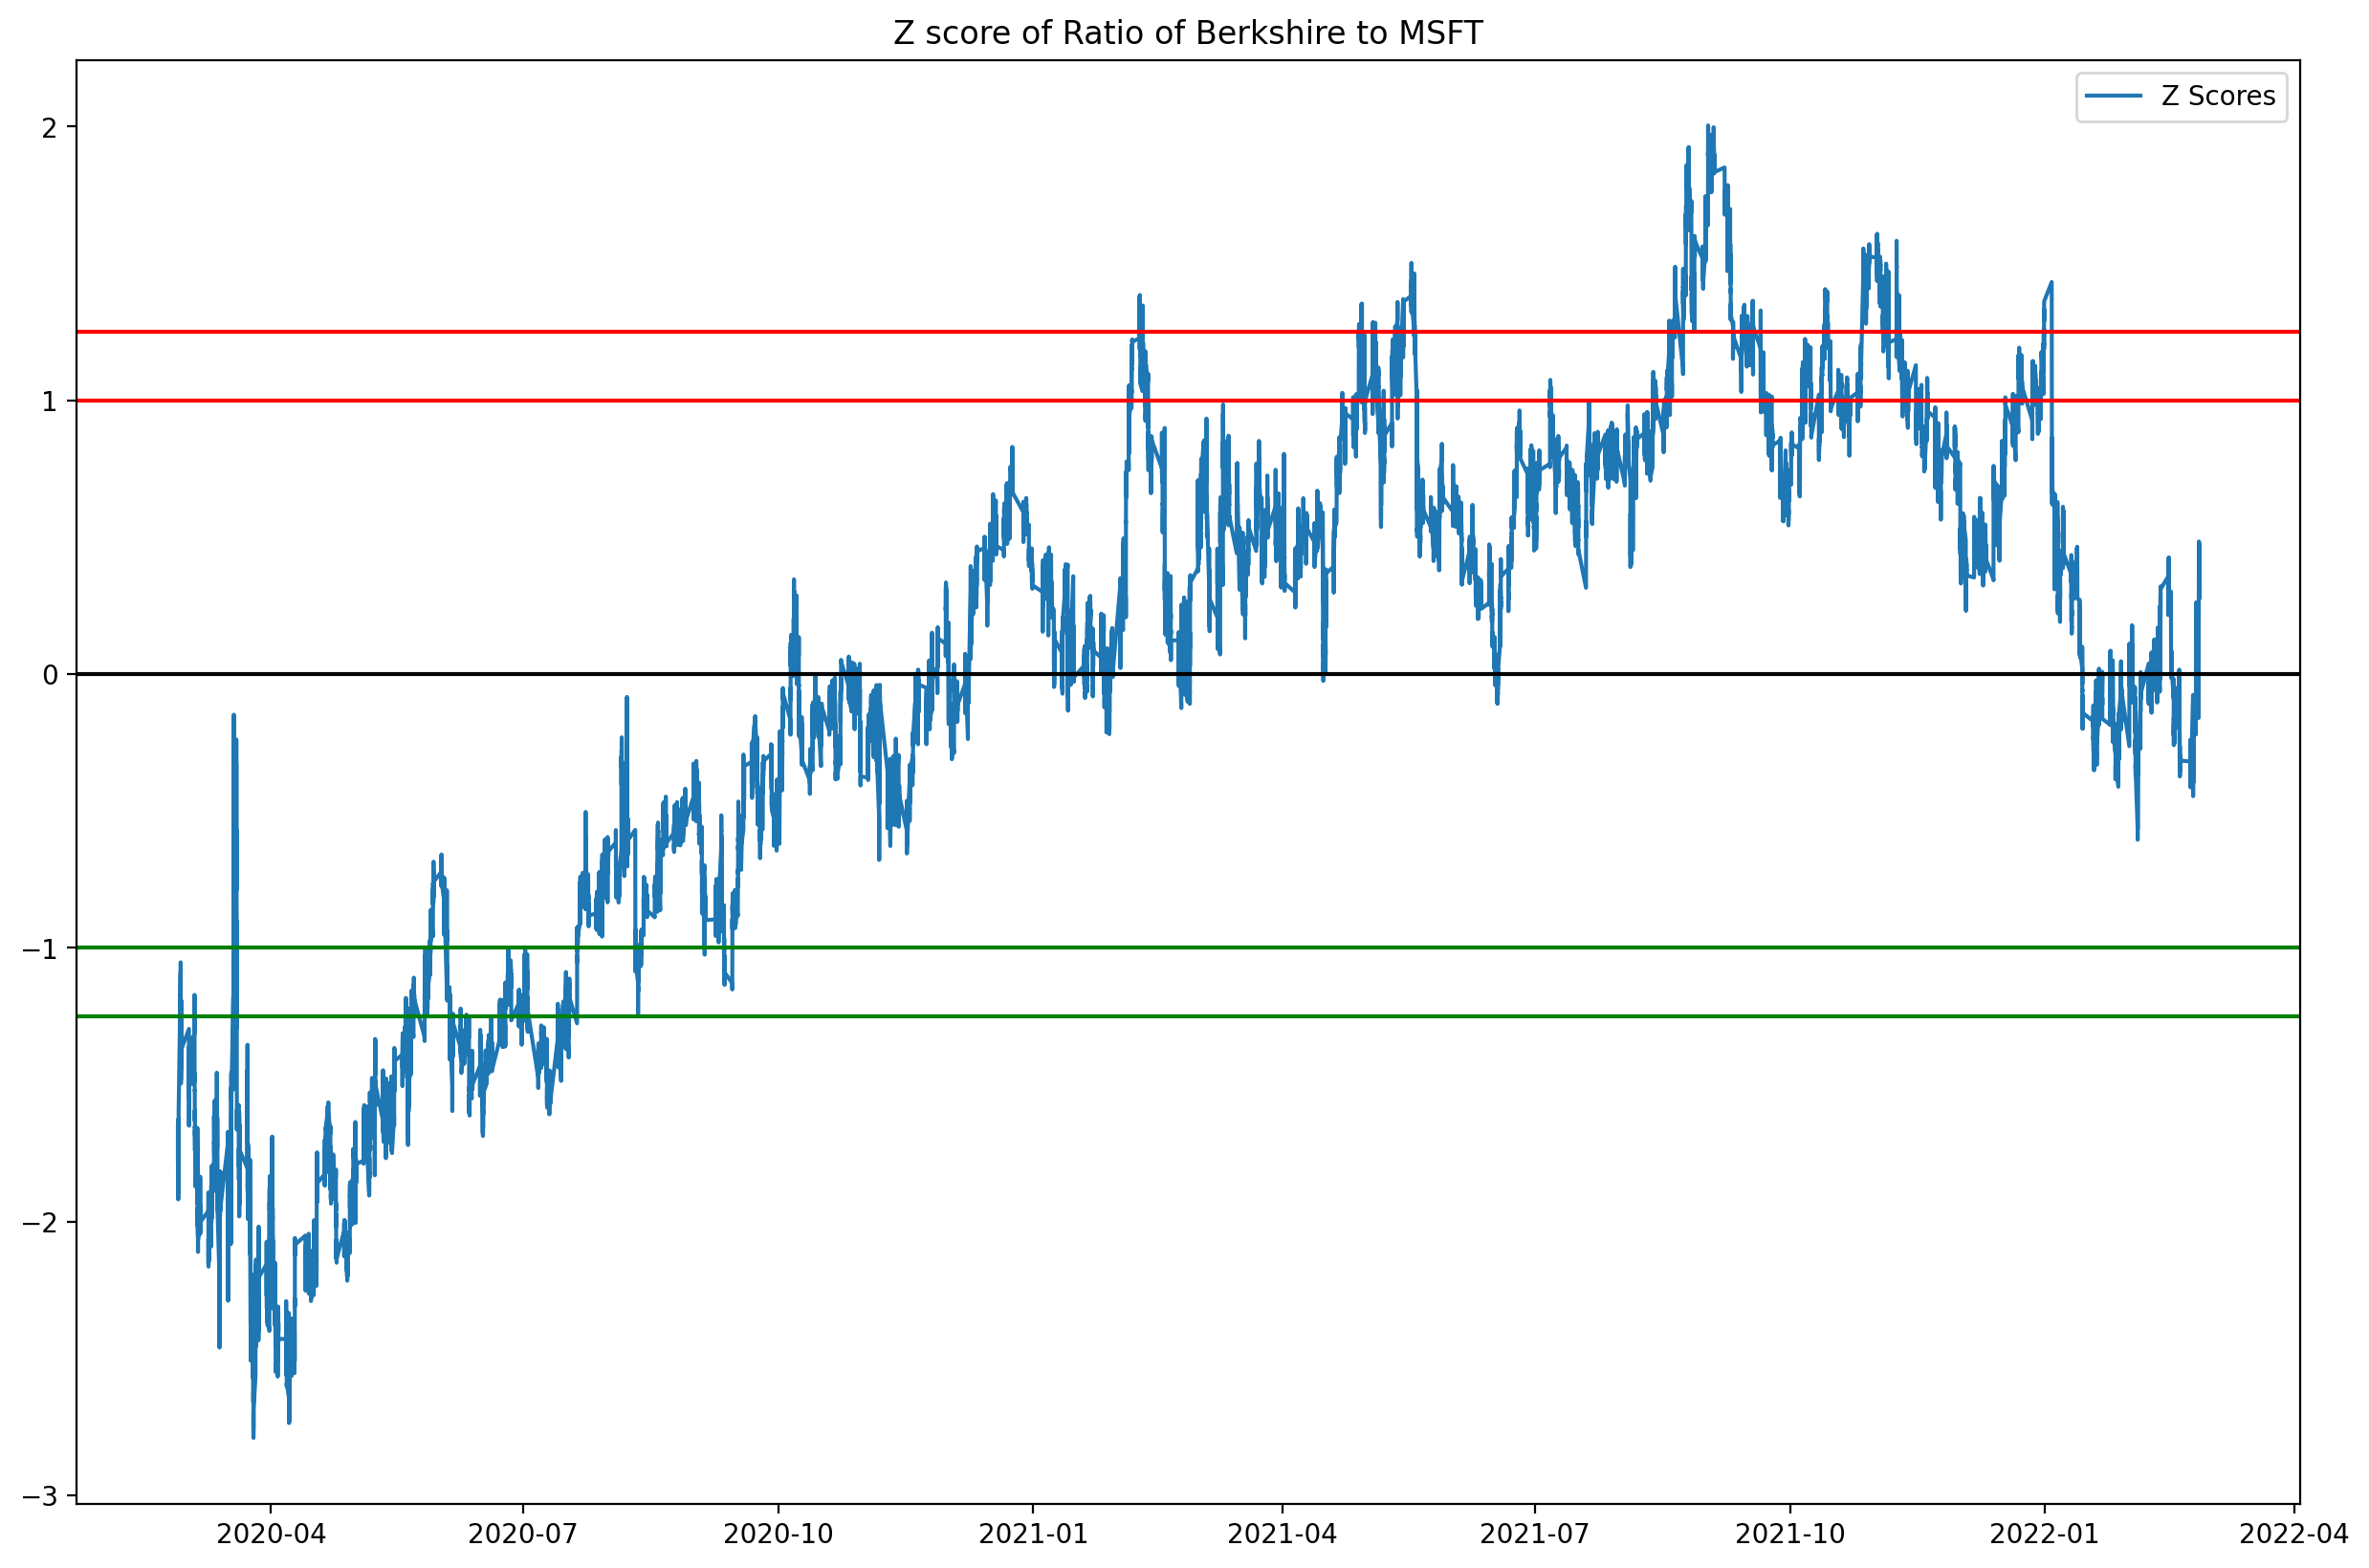

In [140]:
# NOTE, here you can either use the spread OR the Price ratio approach. Anyways, let's standardize the ratio so we can have a 
# upper and lower bound to help evaluate our trends.. Let's stick with the ratio data.
figure(figsize=(15, 10), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of Berkshire to MSFT')
plt.show()
# For the most part, the range that exists outside of these 'bands' must come converge back to the mean. Thus, you can 
# determine when you can go long or short the pair (BRK_B to MSFT).

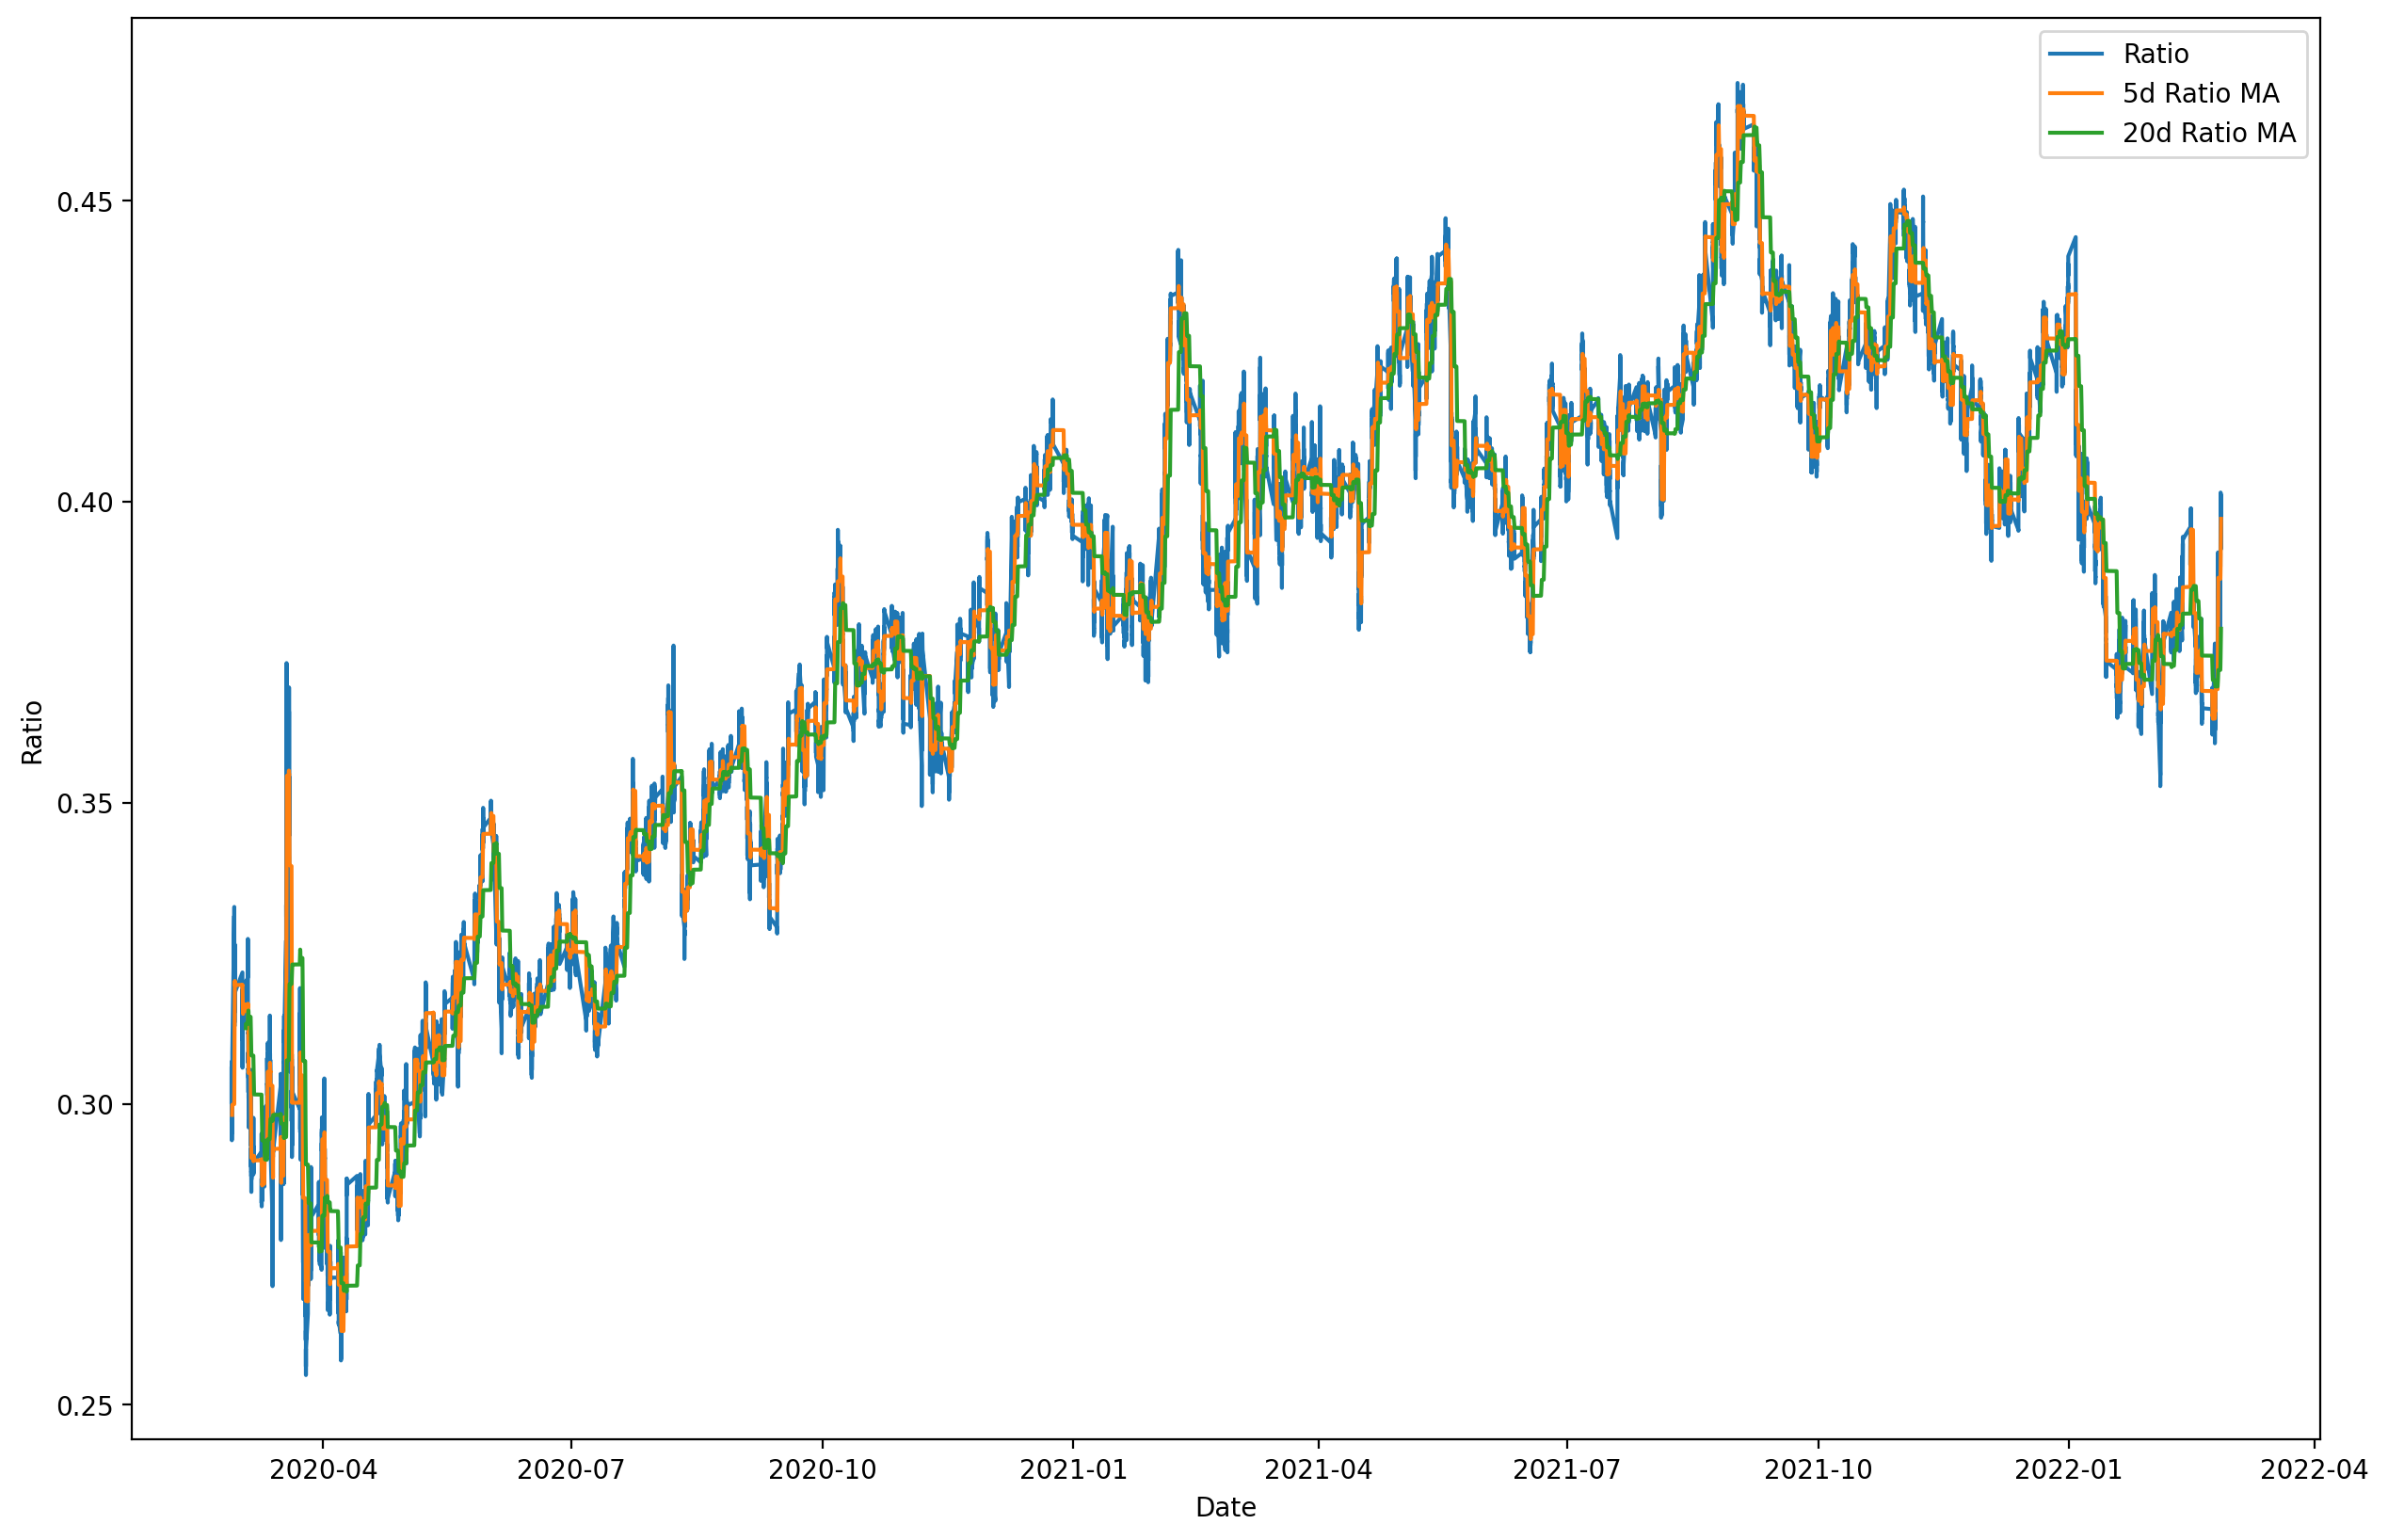

In [156]:
figure(figsize=(15, 10), dpi=200)
ratios_mavg5 = ratio.rolling(window=300, center=False).mean()
ratios_mavg20 = ratio.rolling(window=1500, center=False).mean()
std_20 = ratio.rolling(window=1500, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()

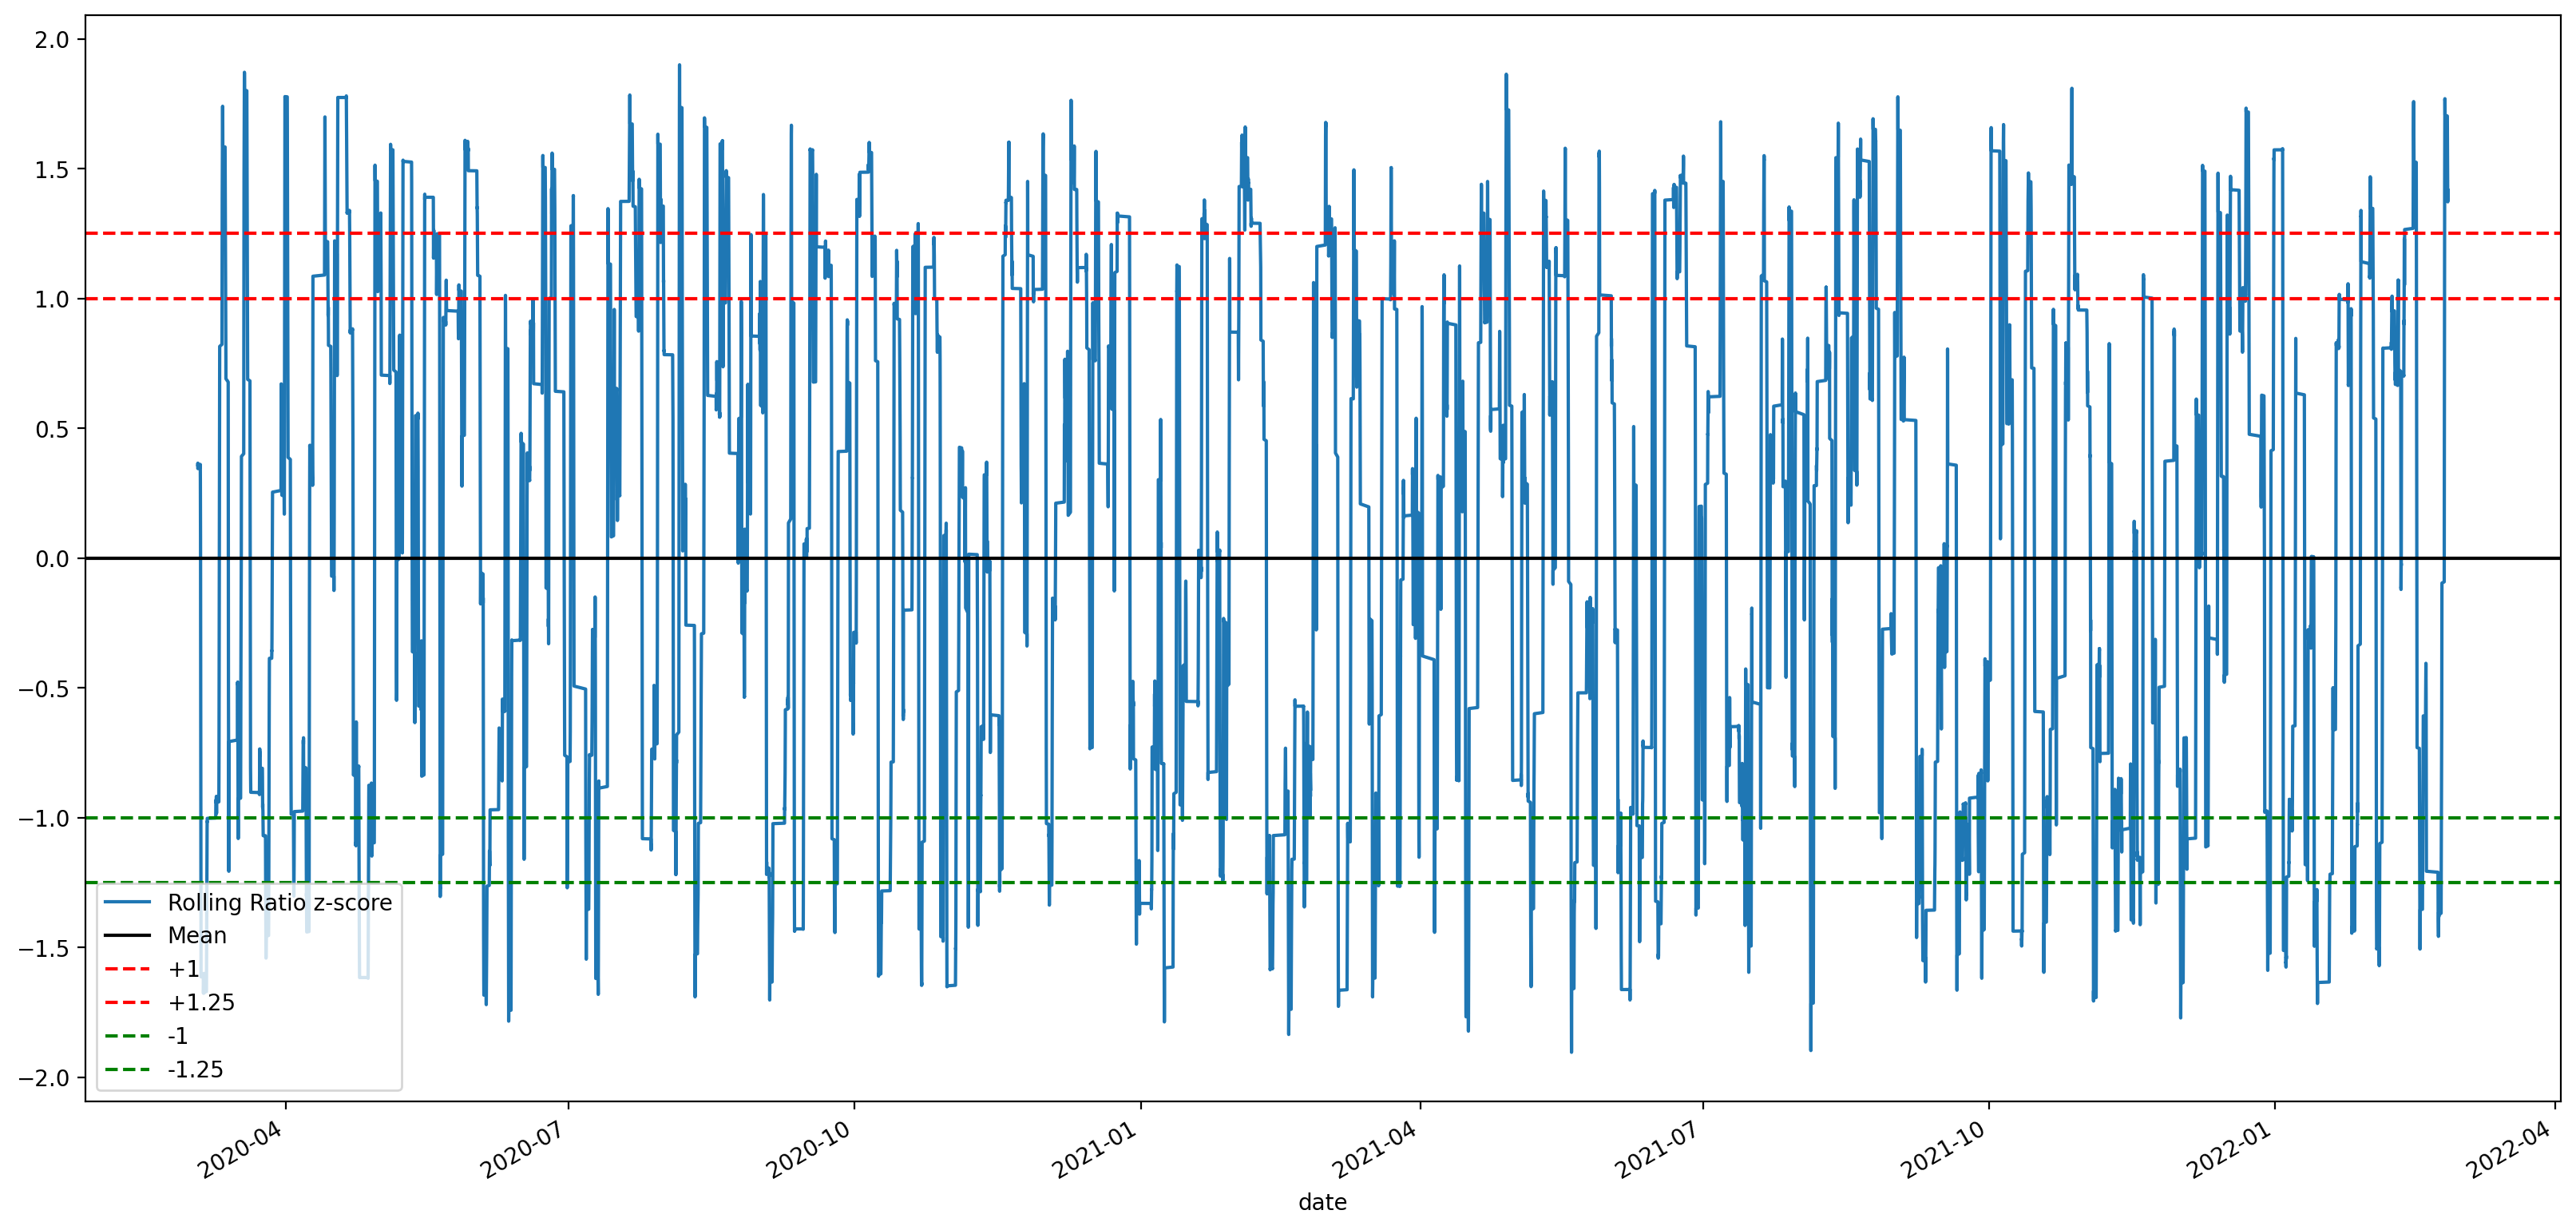

In [160]:
figure(figsize=(20, 10), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

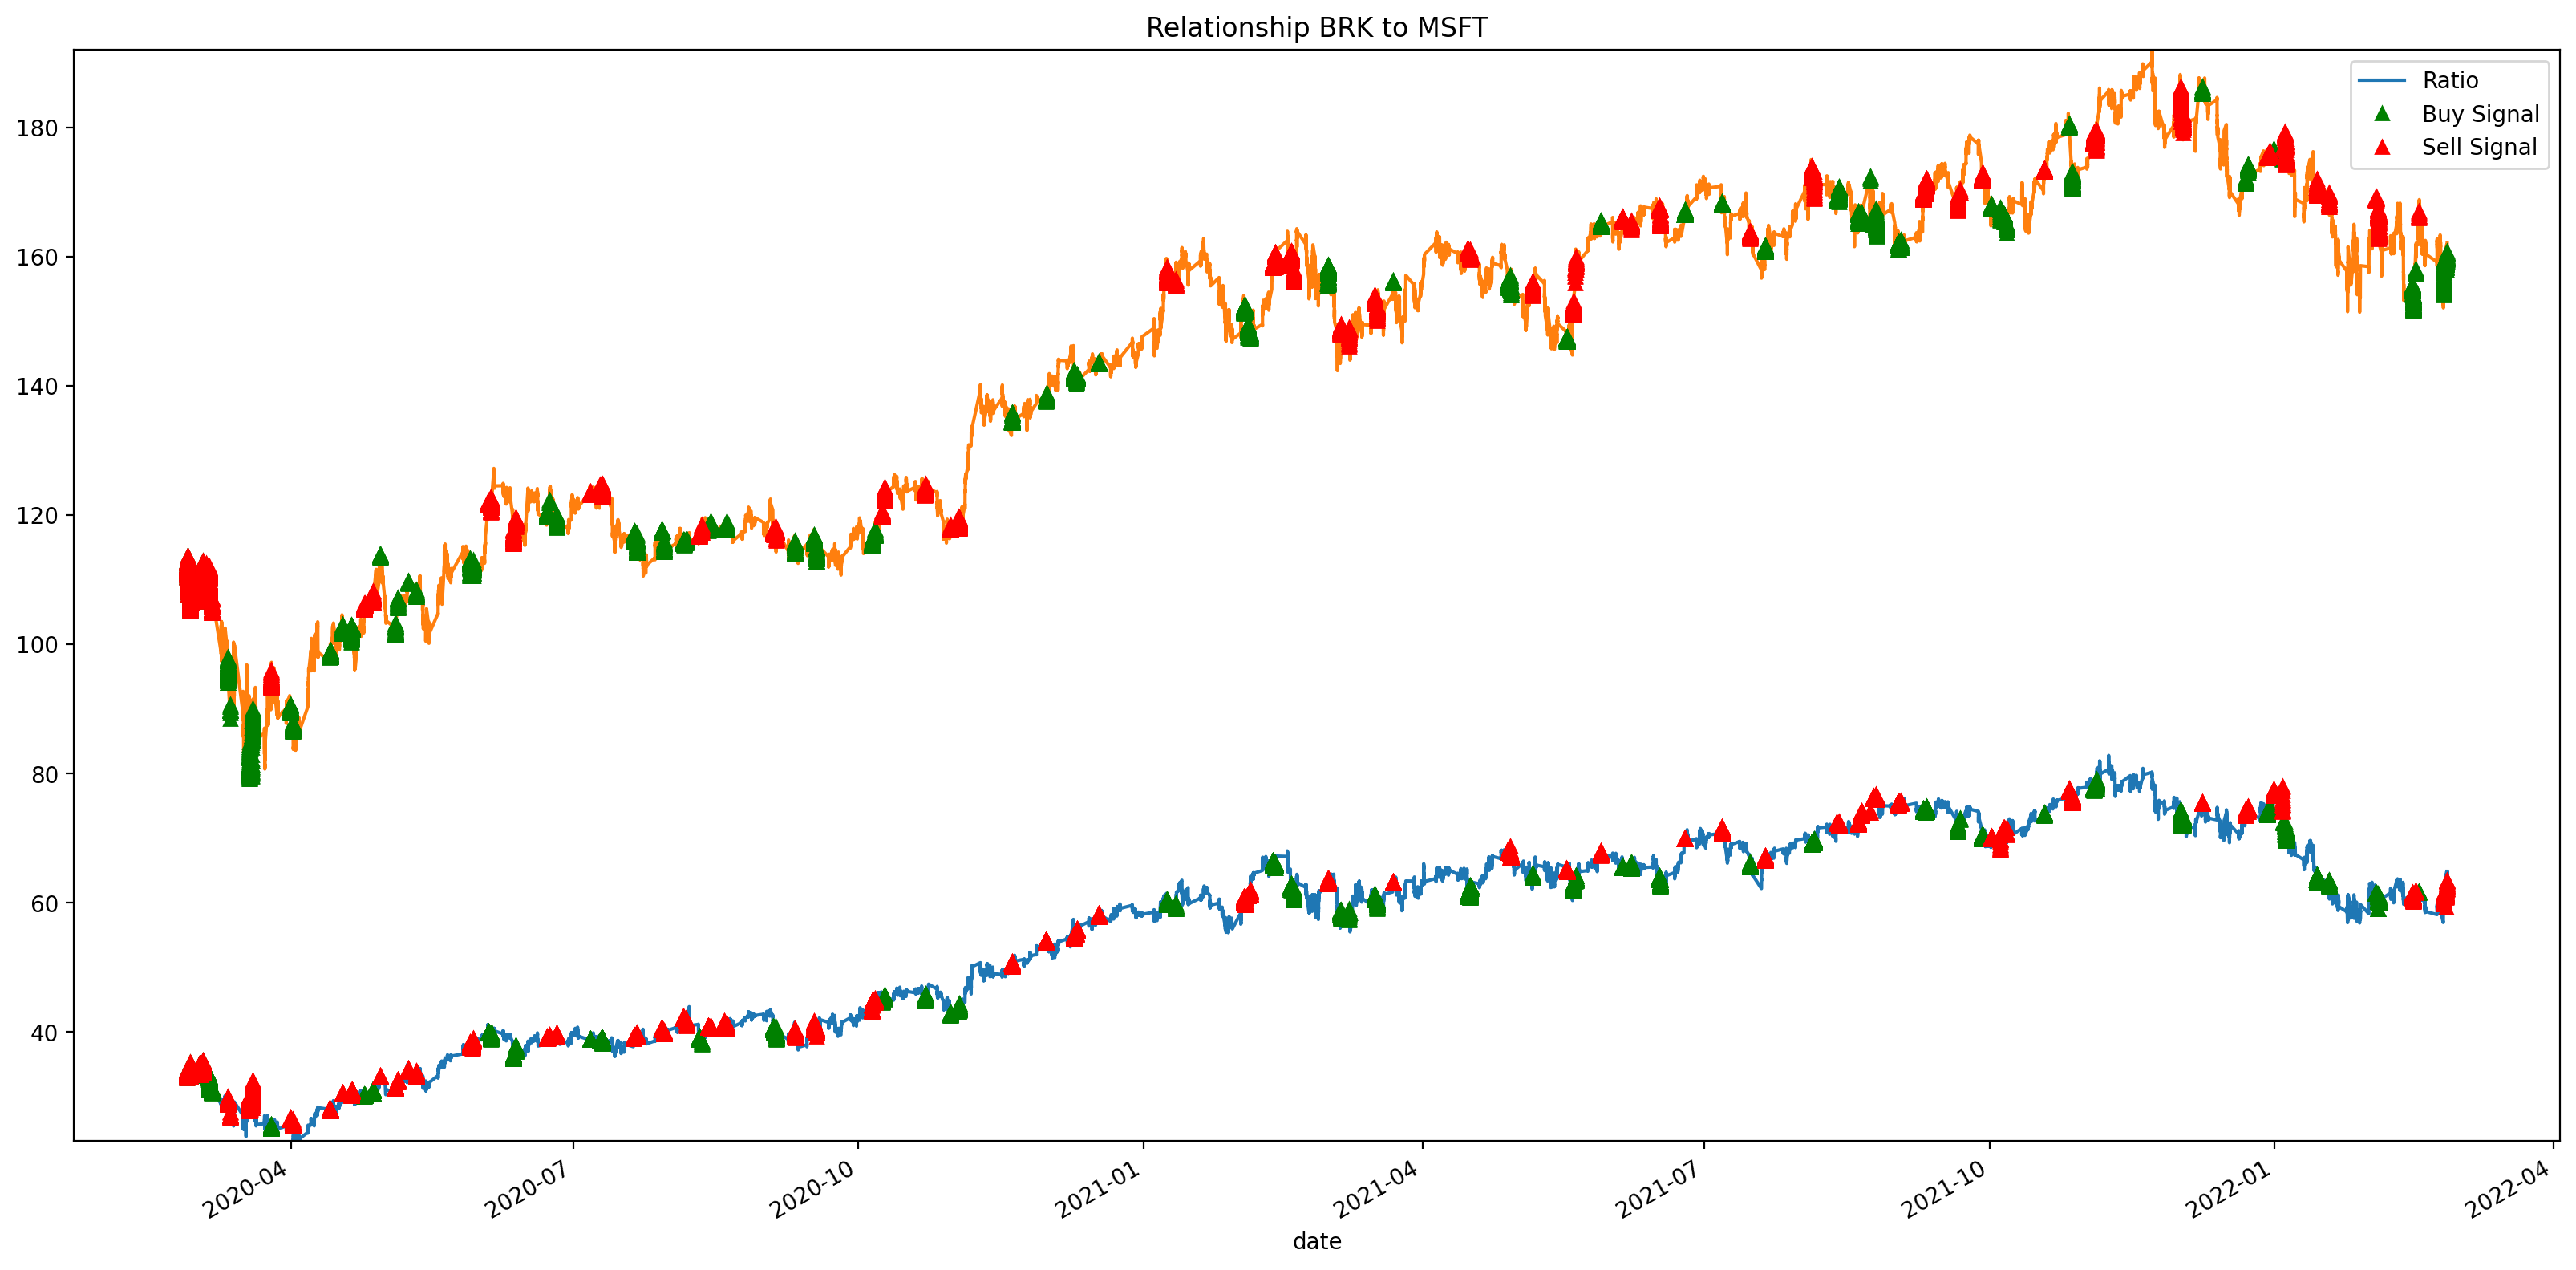

In [169]:
figure(figsize=(20, 10), dpi=200)
ALTR.plot()
buy = ALTR.copy()
sell = ALTR.copy()
buy[zscore_20_5>-1.5] = 0
sell[zscore_20_5<1.5] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')

ADI.plot()
buy = ADI.copy()
sell = ADI.copy()
buy[zscore_20_5<1.5] = 0
sell[zscore_20_5>-1.5] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')

x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ALTR.min(), ADI.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship BRK to MSFT')
plt.show()